<a href="https://colab.research.google.com/github/otoBrooke/colabTest/blob/colabUpdate/SummaryStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I.1 Loading Greg data as dfdata

In [ ]:
## Loading Greg
# Open csv file in drive called "Kevin Working copy of UNVALIDATED DHI analysis (122324)"

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# worksheet = Greg's output
gc = gspread.authorize(creds)
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/15EiYDrJXncguzNDPP7OlNIE_oszlqRT6fsjunj9VJHU/edit?usp=sharing'
sh = gc.open_by_url(spreadsheet_url)
# Open only the tab with the "Listing of data"
work_sheet = sh.worksheet("Output1")    # Get the worksheet with the ground truth

# Get all values from the worksheet
data = work_sheet.get_all_values()

# Assuming the third row in 'data' contains the headers:
# The first two rows are empty (the first row has "Listing of data used in analysis (mITT)")
headers = data[2]
# Convert the data to a Pandas DataFrame
dfdata = pd.DataFrame(data[3:], columns=data[2])

# Remove all the CR in the headers and replace them with _  so that
# Randomized\nAssignment becomes Randomized_Assignment
dfdata.columns = [c.replace("\n", "_") for c in dfdata.columns]

# Display the first few rows of the DataFrame
#print("First few rows of data1:")
#print(df.head())
print(f' dfdata size {dfdata.shape}')

 dfdata size (197, 18)


# I.2 Loading GGC data as dfGGCraw

In [ ]:
## Loading GGC

#Working copy of Consolidated Copy of Pivotal Trial Scheduled Events (Regular)
# Open "Kevin Working copy of Consolidated Copy of Pivotal Trial Scheduled Events (Regular)"
# raw_sheet = Full GGC data
# DAD: Dec 30

spreadsheet_url2 = "https://docs.google.com/spreadsheets/d/1kfXUwffOI1_HrKJk5mOnX9T6ImoAO0NuOXxObcF0WpY/edit?usp=sharing"
sh2 = gc.open_by_url(spreadsheet_url2)
raw_sheet = sh2.worksheet("RawOutput1")
raw_data = raw_sheet.get_all_values()
raw_headers = raw_data[2]
dfGGCraw = pd.DataFrame(raw_data[3:], columns=raw_data[2])

print(f' dfGGCraw size {dfGGCraw.shape}')


 dfGGCraw size (391, 985)


## I.2.P1 dpruned: GGC mITT subjects
- (from Greg's dfdata)
- Also, creating dfpruned_cl for now, until I am sure there are no issues with simplifying headers.

In [ ]:
## Select from dfGGCraw only the rows with the SubjectID that are in Greg's dfdata
dfpruned = dfGGCraw[dfGGCraw['subjectId'].isin(dfdata['SubjectID'])]

# Remove all the CR characters, so that 'DHI\nresponse' becomes 'DHI_response'
dfpruned.columns = [c.replace("\n", "_") for c in dfpruned.columns]

#  Function to clean column headers, to remove redundant parts of column headers
def clean_column_name(name):
    name = name.replace('E2_VM', '')
    name = name.replace('TransitionQuestionnaires_VM', '')
    name = name.replace('TreatmentQuestionnaires_VM', '')
    name = name.replace('TransitionQuestionnaires_DHI', 'DHI')
    name = name.replace('TreatmentQuestionnaires_DHI', 'DHI')
    name = name.replace('StudyWrapUp_StudyWrapUp_', 'WrapUp_')
    return name

dfpruned_cl = dfpruned.copy(deep=True)    # Could make a shallow copy so all changes in dfpruned_cl would be reflected in dfpruned?

# Apply the function clean_column_name to the columns of dfpruned_cl
dfpruned_cl.columns = [clean_column_name(col) for col in dfpruned_cl.columns]

# The columns of dfpruned are simplified in dfpruned_cl, so that all
# enrollment PATHI questions are now dfpruned_cl['PATHI1...']
# transition PATHI questions are now dfpruned_cl['PATHI2...']
# treatment  PATHI questions are now dfpruned_cl['PATHI3...']
# transition DHI questions are now dfpruned_cl['DHI2...']
# treatment  DHI questions are now dfpruned_cl['DHI3...']
# ALSO
# All the WrapUp columns such as 'StudyWrapUp_StudyWrapUp_Q23' are simplifed
#   and are now dfpruned_cl['StudyWrapUp_Q23] for instance

# Find the .letter values in all Q{r}
# unique_values = []
# # Iterate through the columns with format D{s}TSD_TreatmentDiary_Q1'
# for r in range(1, 12):
#     unique_values = []
#     b_count = 0
#     h_count = 0
#     for s in range(1, 29):
#         col_name = f'D{s}TSD_TreatmentDiary_Q{r}'
#         if col_name in dffull.columns:
#             col = dffull[col_name]
#             b_count += col.apply(lambda x: x == '.b').sum()
#             h_count += col.apply(lambda x: x == '.h').sum()
#             unique_values.extend(col.unique().tolist())

#     print(f"Number of '.b' entries for r={r}: {b_count}")
#     print(f"Number of '.h' entries for r={r}: {h_count}")

#     # Get the set of unique values
#     unique_values = set(unique_values)
#     # Print the unique values
#     print(f"Unique values for  question {r}: {unique_values}")


# If you want to check:
#DHI_Cols = pd.DataFrame({'DHI2_Columns': dfpruned.columns[dfpruned.columns.str.contains('DHI2_')],
#                        'DHI2_Cleaned': dfpruned_cl.columns[dfpruned.columns.str.contains('DHI2_')]})
#print(f'{DHI_Cols}\n')

# # Example code of how to find all the columns that contain the word 'PATHI1'
# PATHI_Cols = dfpruned.columns[dfpruned.columns.str.contains('PATHI1')]
# print(f'{PATHI_Cols}\n')
# # Alternatively, to get it directly
# print(dfpruned_cl.columns[dfpruned_cl.columns.str.contains('PATHI1')])

# print(f' dfpruned size {dfpruned.shape}')

# NOTE: if you want to print _all_ the elements of a dataframe, (by default, it only shows about 20 lines), use
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns (if relevant)


## I.2.P2 df_full: dfdata plus GGC
- with same SubjectID

In [ ]:
## CREATE a new dataframe called DF_FULL
# DAD Jan 03 2025: added the conversion of _SCORE and (trans-trt) columns to floats.
#                   More columns will probably need to be cast to floats.

# containing Greg's dfdata AND the columns of dfpruned_cl, i.e. dfpruned with headers shortened as above.
# Merge the two dataframes
df_full = pd.merge(dfdata,
                  dfpruned_cl,
                  left_on='SubjectID',
                  right_on='subjectId',
                  how='left')

# Drop the redundant 'subjectId' column (from dfpruned)
df_full.drop('subjectId', axis=1, inplace=True)


# For those columns ending in _SCORE in which floats are interpreted as CHARs
for col in df_full.columns:
    if col.endswith(('_SCORE','- trt)')) and df_full[col].dtype != np.number:  # Check data type
        try:
            df_full[col] = pd.to_numeric(df_full[col], errors='raise')  # Raise errors
        except ValueError:
            # Handle the error, e.g., print a warning or investigate the data
            print(f"Warning: Column '{col}' contains non-numeric values and could not be cast to float.")

# Adding columns with Greg's data, but inverted so negative = improvement

df_full['W_DHI_23'] =   -df_full['Change in_DHI total_score_(trans - trt)']
df_full['W_DHI_f_23'] = -df_full['Change in_DHI_functional_score (trans_- trt)']
df_full['W_DHI_p_23'] = -df_full['Change in_DHI physical_score (trans_- trt)']
df_full['W_DHI_e_23'] = -df_full['Change in_DHI_emotional_score (trans_- trt)']

print(f' df_full size {df_full.shape}')
# Finally, define delta_VMPATHI 12 and 23
df_full['Delta_PATHI12'] = df_full['PATHI2_SCORE'].astype(float) - df_full['PATHI1_SCORE'].astype(float)
df_full['Delta_PATHI23'] = df_full['PATHI3_SCORE'].astype(float) - df_full['PATHI2_SCORE'].astype(float)


 df_full size (197, 1006)


# I.3 Log Data Import
Summarized data from each usage log


In [ ]:
# formatted log data sheet import
gc = gspread.authorize(creds)
# original log data
#data_log = gc.open_by_url("https://docs.google.com/spreadsheets/d/13yYAif_akSbWBa3FpXn2_P2TotJwkpd6qXjt01jCHKI/edit?gid=1482500950#gid=1482500950")

# switching with time adjusted log data
#data_log = gc.open_by_url("https://docs.google.com/spreadsheets/d/1NLR8BAGXJ_-5F2mf05dJSXhMaHUjr6jIlbta23zG4Fk/edit?gid=873468708#gid=873468708")

# switching to padded days log data
data_log = gc.open_by_url("https://docs.google.com/spreadsheets/d/1uvQYMqcQ1XEIXLC7B_pLR_aCzYxMldrtqcYfotRQpxo/edit?gid=1472316608#gid=1472316608")

# Open worksheet and extract values
worksheet = data_log.get_worksheet(0)
data = worksheet.get_all_values()

# Convert the data into a pandas DataFrame
df_log = pd.DataFrame(data[1:], columns=data[0])  # Use the first row as the header and the rest as data

# remove duplicated index column
df_log.drop(df_log.columns[0], axis=1, inplace=True)

# Convert all columns except SubjectID and log available to numeric
for col in df_log.columns[2:]:
    df_log[col] = pd.to_numeric(df_log[col], errors='coerce')  # Coerce invalid values to NaN


merged_df = pd.merge(df_full, df_log, how='outer', on = 'SubjectID')
df_full = merged_df
print(df_full['log_available_qc'])
print(df_full.columns.tolist())

df_full['log_available_qc'].value_counts()

0      Yes
1       No
2      Yes
3      Yes
4      Yes
      ... 
192    Yes
193    Yes
194    Yes
195    Yes
196    Yes
Name: log_available_qc, Length: 197, dtype: object
['SubjectID', 'site', 'pseudo_site_mITT', 'siteName_x', 'Randomized_Assignment', 'TransQuestion_DHI2_SCORE', 'TreatQuestion_DHI3_SCORE', 'Change in_DHI total_score_(trans - trt)', 'DHI_response', 'DHI_functional_score_(trans)', 'DHI_functional_score_(treat)', 'Change in_DHI_functional_score (trans_- trt)', 'DHI_physical_score_(trans)', 'DHI_physical_score_(treat)', 'Change in_DHI physical_score (trans_- trt)', 'DHI_emotional_score_(trans)', 'DHI_emotional_score_(treat)', 'Change in_DHI_emotional_score (trans_- trt)', 'id', 'status', 'gender', 'dateOfBirth', 'siteName_y', 'enrollmentStartDate', 'enrollmentFinishDate', 'enrollmentSignOffBy', 'enrollmentSignOffTime', 'Enrollment_status', 'E2_status', 'E3_status', 'D1BSD_status', 'D2BSD_status', 'D3BSD_status', 'D4BSD_status', 'D5BSD_status', 'D6BSD_status', 'D7BSD_statu

,count
log_available_qc,
Yes,191
No,4
Corrupted,2


## Correlation Percent Calculation
Calculate percent correlation between log usage and reported usage. Add "Correlation_Percent" column to df_full <br>
Second block adds column for each day indicating if it was a match or not

In [ ]:
# # Create empty lists to store results
# subject_ids = []
# consistent_count = []
# inconsistent_count = []
# skipped_subjects = []



# # Iterate through each SubjectID
# for _, row in df_full.iterrows():
#     con_count = 0
#     incon_count = 0

#     # Get the SubjectID
#     subject_id = row['SubjectID']

#     if row['log_available_qc'] == 'No':
#         skipped_subjects.append(subject_id)
#         continue

#     subject_ids.append(subject_id)

#     # Loop through days 1 to 28
#     for day in range(1, 29):
#         # Column names for reported and actual usage
#         reported_col = f"D{day}TSD_TreatmentDiary_Q6"
#         actual_col = f"Log_Day_{day}_Session_Count"


#         # Skip if either column doesn't exist
#         if reported_col not in df_full.columns:
#             print("ERROR1")
#             continue
#         if actual_col not in df_full.columns:
#             print("ERROR2")
#             continue

#         # Get reported and actual usage for the day
#         reported = row[reported_col]
#         actual = row[actual_col]

#         # increase the consistent use count if usage matches in one of two ways
#         # dont change anything otherwise
#         if (reported == "Yes") & (actual > 0):
#             con_count += 1

#         elif (reported in ["No", ".h"]) & (actual == 0):
#             con_count += 1
#         else:
#             con_count += 0
#     # Append the counts to the lists
#     consistent_count.append(con_count)
#     #inconsistent_count.append(incon_count)

# # Create a new DataFrame with the results
# df_usage_results = pd.DataFrame({
#     'SubjectID': subject_ids,
#     'Consistent_Usage_Count': consistent_count
#     #'Inconsistent_Usage_Count': inconsistent_count
# })


# # calculate correlation percentage
# df_usage_results['Correlation Percent'] = df_usage_results['Consistent_Usage_Count'] / 28 *100
# # Display the results DataFrame
# print(df_usage_results)
# print("Subjects without logs: " + str(skipped_subjects))

# # df_usage_results = df_usage_results.merge(df_full[['SubjectID', 'Randomized_Assignment']], on='SubjectID', how='left')

# df_full = df_full.merge(df_usage_results[['SubjectID', 'Correlation Percent']], on='SubjectID', how='left')

# # Create plot with larger size, as a function of "sham" vs "effective"
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))

# # Get data for each group
# sham_scores = df_full[df_full['Randomized_Assignment'] == 'Sham']['Correlation Percent']
# effective_scores = df_full[df_full['Randomized_Assignment'] == 'Intervention']['Correlation Percent']

# # Create histogram for both groups
# bin = range(0, 101, 10)

# plt.hist(sham_scores, alpha=0.5, label='Sham', bins=bin, color='blue')
# plt.hist(effective_scores, alpha=0.5, label='Effective', bins=bin, color='red')

# # Add labels and title
# plt.xlabel('Correlation Percent')
# plt.ylabel('Frequency')
# plt.title('Distribution of Correlation Percent by Assignment Group')
# plt.legend()

# # Add grid for better readability
# plt.grid(True, alpha=0.3)

# # Show plot
# plt.show()

# print(df_full.columns)

    SubjectID  Consistent_Usage_Count  Use_Match_D1  Use_Match_D2  \
0    ALRG-007                       3             1             0   
1    ALRG-033                      24             1             1   
2    ALRG-039                       4             1             1   
3    BEHC-006                      23             1             0   
4    BEHC-011                      25             1             1   
..        ...                     ...           ...           ...   
188  UMIA-008                      23             1             1   
189  USCA-021                      16             1             1   
190  USCA-028                      28             1             1   
191  USCA-040                      24             1             1   
192  USCA-042                       4             1             0   

     Use_Match_D3  Use_Match_D4  Use_Match_D5  Use_Match_D6  Use_Match_D7  \
0               0             1             0             0             0   
1               1

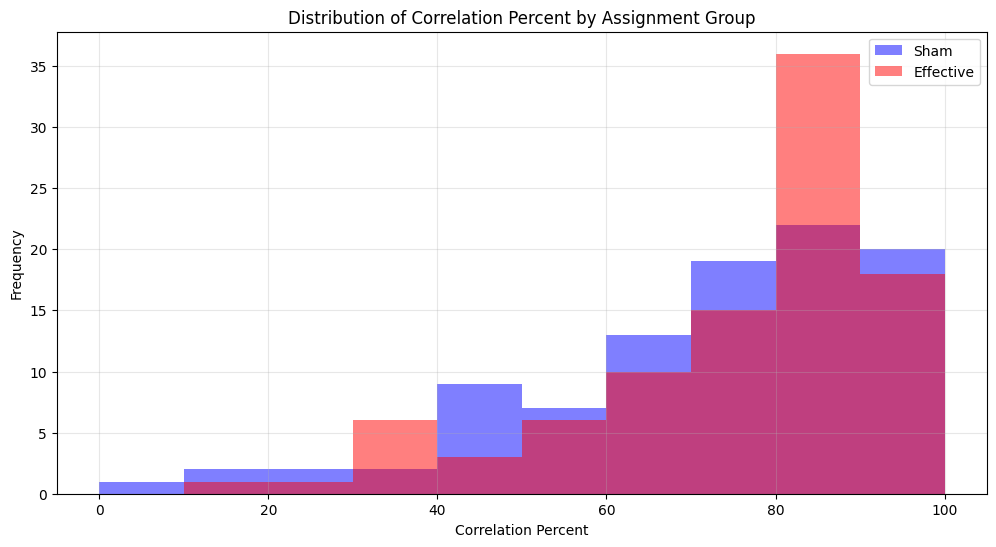

    SubjectID  site pseudo_site_mITT     siteName_x Randomized_Assignment  \
0    ALRG-007  ALRG  LowAccrualSites  Eastern\nSite                  Sham   
1    ALRG-011  ALRG  LowAccrualSites  Eastern\nSite                  Sham   
2    ALRG-033  ALRG  LowAccrualSites  Eastern\nSite                  Sham   
3    ALRG-039  ALRG  LowAccrualSites  Eastern\nSite          Intervention   
4    BEHC-006  BEHC  LowAccrualSites  Pacific\nSite          Intervention   
..        ...   ...              ...            ...                   ...   
192  UMIA-008  UMIA  LowAccrualSites  Eastern\nSite          Intervention   
193  USCA-021  USCA  LowAccrualSites  Pacific\nSite                  Sham   
194  USCA-028  USCA  LowAccrualSites  Pacific\nSite          Intervention   
195  USCA-040  USCA  LowAccrualSites  Pacific\nSite          Intervention   
196  USCA-042  USCA  LowAccrualSites  Pacific\nSite                  Sham   

     TransQuestion_DHI2_SCORE  TreatQuestion_DHI3_SCORE  \
0               

In [ ]:
# Create empty lists to store results
subject_ids = []
consistent_count = []
skipped_subjects = []

# Create a dictionary to store daily match results
daily_matches = {f'Use_Match_D{day}': [] for day in range(1, 29)}

# Iterate through each SubjectID
for _, row in df_full.iterrows():
    con_count = 0
    daily_match_values = []  # Temporary list to store match values for this subject

    # Get the SubjectID
    subject_id = row['SubjectID']

    # if log is unavailable, match column will be NaN after final merge
    if row['log_available_qc'] == 'No':
        skipped_subjects.append(subject_id)
        for day in range(1, 29):
            daily_match_values.append(0)
        continue

    subject_ids.append(subject_id)

    # Loop through days 1 to 28
    for day in range(1, 29):
        # Column names for reported and actual usage
        reported_col = f"D{day}TSD_TreatmentDiary_Q6"
        actual_col = f"Log_Day_{day}_Session_Count"

        # Skip if either column doesn't exist
        if reported_col not in df_full.columns or actual_col not in df_full.columns:
            print(f"ERROR: Missing column(s) for Day {day} in SubjectID {subject_id}")
            daily_match_values.append(0)  # Default to 0 (inconsistent) if column is missing
            continue

        # Get reported and actual usage for the day
        reported = row[reported_col]
        actual = row[actual_col]

        # Determine consistency
        if (reported == "Yes") and (actual > 0):
            con_count += 1
            # set match column to 1 if usage was consistent
            daily_match_values.append(1)
        elif (reported in ["No", ".h"]) and (actual == 0):
            con_count += 1
            # set match column to 1 if usage was consistent
            daily_match_values.append(1)
        else:
            # set match column to 0 if usage was inconsistent
            daily_match_values.append(0)

    # Append the counts to the lists
    consistent_count.append(con_count)

    # Add daily match results for this subject
    for i, day in enumerate(range(1, 29)):
        daily_matches[f'Use_Match_D{day}'].append(daily_match_values[i])

# Create a new DataFrame with the results
df_usage_results = pd.DataFrame({
    'SubjectID': subject_ids,
    'Consistent_Usage_Count': consistent_count
})

# Add daily match results to the usage results DataFrame
for day in range(1, 29):
    df_usage_results[f'Use_Match_D{day}'] = daily_matches[f'Use_Match_D{day}']

# Calculate correlation percentage
df_usage_results['Correlation Percent'] = df_usage_results['Consistent_Usage_Count'] / 28 * 100

# Display the results DataFrame
print(df_usage_results)
print("Subjects without logs: " + str(skipped_subjects))

# Merge the correlation percent and daily match columns back into the original DataFrame
columns_to_merge = ['SubjectID', 'Correlation Percent'] + [f'Use_Match_D{day}' for day in range(1, 29)]
df_full = df_full.merge(df_usage_results[columns_to_merge], on='SubjectID', how='left')

print(df_full.columns.tolist())

print(df_full)

# Create plot with larger size, as a function of "sham" vs "effective"
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Get data for each group
sham_scores = df_full[df_full['Randomized_Assignment'] == 'Sham']['Correlation Percent']
effective_scores = df_full[df_full['Randomized_Assignment'] == 'Intervention']['Correlation Percent']

# Create histogram for both groups
bin = range(0, 101, 10)

plt.hist(sham_scores, alpha=0.5, label='Sham', bins=bin, color='blue')
plt.hist(effective_scores, alpha=0.5, label='Effective', bins=bin, color='red')

# Add labels and title
plt.xlabel('Correlation Percent')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Percent by Assignment Group')
plt.legend()

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show plot
plt.show()

print(df_full)

# I.4 Quality Data Import
This is information taken from devices returned from the study. This includes:


1.   Calibration information (drift 30% Yes/No)
2.   Log available? (proxy for if its been returned)
3.   Was it used for 10 minutes or more? Yes/No

Brooke owns this dataset and code.



In [ ]:
## I.4 Quality Data Import
# BW Dec 30 2024

gc = gspread.authorize(creds) # We already use the creds above
data = gc.open_by_url("https://docs.google.com/spreadsheets/d/15T473vqaJ746Gi0Bm2xPi8-2dYW4y1yrLSOl7oMlruQ/edit?usp=sharing").sheet1.get_all_values() #file location
I4_df_Qdata = pd.DataFrame(data[1:], columns=data[0]) #Including ticket number in variable name to ensure it is not used eslewhere
I4_df_Qdata.head() #displaying .head so people know what this data looks like

# adding qc data to df_full
df_merge = pd.merge(df_full, I4_df_Qdata, how='outer', on = ['SubjectID'])
df_full = df_merge

# Rename 'log_available_x' to 'log_available' if it exists
if 'log_available_qc_x' in df_full.columns:
    df_full = df_full.rename(columns={'log_available_qc_x': 'log_available'})

# Delete 'log_available_y' if it exists
if 'log_available_qc_y' in df_full.columns:
    df_full = df_full.drop(columns=['log_available_qc_y'])

print(df_full.columns.tolist())

['SubjectID', 'site', 'pseudo_site_mITT', 'siteName_x', 'Randomized_Assignment', 'TransQuestion_DHI2_SCORE', 'TreatQuestion_DHI3_SCORE', 'Change in_DHI total_score_(trans - trt)', 'DHI_response', 'DHI_functional_score_(trans)', 'DHI_functional_score_(treat)', 'Change in_DHI_functional_score (trans_- trt)', 'DHI_physical_score_(trans)', 'DHI_physical_score_(treat)', 'Change in_DHI physical_score (trans_- trt)', 'DHI_emotional_score_(trans)', 'DHI_emotional_score_(treat)', 'Change in_DHI_emotional_score (trans_- trt)', 'id', 'status', 'gender', 'dateOfBirth', 'siteName_y', 'enrollmentStartDate', 'enrollmentFinishDate', 'enrollmentSignOffBy', 'enrollmentSignOffTime', 'Enrollment_status', 'E2_status', 'E3_status', 'D1BSD_status', 'D2BSD_status', 'D3BSD_status', 'D4BSD_status', 'D5BSD_status', 'D6BSD_status', 'D7BSD_status', 'D8BSD_status', 'D9BSD_status', 'D10BSD_status', 'D11BSD_status', 'D12BSD_status', 'D13BSD_status', 'D14BSD_status', 'BaselineCheckIn_status', 'GeneralVertigoHistory_st

# I.5 Import medical diagnosis data

In [ ]:
## loading DX information from 'Diagnosis Confirmation  - Secondary Dx'
# Diagnosis Confirmation  - Secondary Dx = https://docs.google.com/spreadsheets/d/1NVChbGLMekENm5rB8hqXhsvpmJ7uXumP-4jbAzih9oQ/edit?usp=sharing
# DAD: JAN 07 2025
# in df_dx['Date of Diagnosis'], we convert to
# np.NaT (not a time) if N/A, or
# datetime of July 1 of the year if only the year is given, or
# datetime (if format is a datetime)

spreadsheet_url3 = "https://docs.google.com/spreadsheets/d/1NVChbGLMekENm5rB8hqXhsvpmJ7uXumP-4jbAzih9oQ/edit?usp=sharing"
sh3 = gc.open_by_url(spreadsheet_url3)
# Not necessary for now... until someone adds a tab to the sheet above
dx_sheet = sh3.worksheet("Diagnosis Confirmation  - Secondary Dx")
dx_data = dx_sheet.get_all_values()
dx_headers = dx_data[0]
df_dx = pd.DataFrame(dx_data[1:], columns=dx_data[0])

print(f' df_dx size {df_dx.shape}')
def convert_diagnosis_date(date_str):
    if date_str == 'N/A':
        return np.nan
    try:
        # First try to parse a full date
        return pd.to_datetime(date_str, errors='raise')
    except ValueError:
        try:
            # If not a full date, try parsing a year
            year = int(date_str)
            return pd.to_datetime(f'{year}-07-01')  # set to July 1st
        except ValueError:
             return np.nan # If it cannot be converted, it becomes NaN
# Apply the function to the 'Date of Diagnosis' column
df_dx['Date of Diagnosis'] = df_dx['Date of Diagnosis'].apply(convert_diagnosis_date)
# To see the result
# print(df_dx['Date of Diagnosis'])

## Find the possible values in columns C to G, in order to convert to binary
# columns_to_check = ['VM', 'BPPV', 'Meniere', 'MdDS', 'PPPD']

# # Loop through the columns
# for column in columns_to_check:
#     if column in df_dx.columns:  # Check if the column exists
#         unique_values = df_dx[column].unique()
#         print(f"Unique values in column '{column}': {unique_values}")
#     else:
#         print(f"Column '{column}' not found in df_dx")
# Unique values in column 'VM': ['Definite' 'Probable']
# Unique values in column 'BPPV': ['No' 'Yes']
# Unique values in column 'Meniere': ['No' 'Yes']
# Unique values in column 'MdDS': ['No' 'Yes']
# Unique values in column 'PPPD': ['No' 'Yes']

## If the Spirit moves us and we decide to convert Yes to 1 and No to 0, use
# for column in columns_to_convert:
#     if column in df_dx.columns:  # Check if the column exists
#         # Convert 'Yes' to 1 and 'No' to 0
#         df_dx[column] = df_dx[column].replace({'No': 0, 'Yes': 1})
## But we will stick with 'No' and 'Yes for now, unless we change our minds.

# MERGE df_dx into df_full
df_full = pd.merge(df_full,
                  df_dx,
                  left_on='SubjectID',
                  right_on='Study ID',
                  how='left')
# Drop the redundant 'Study ID' column (from dfpruned)
df_full.drop('Study ID', axis=1, inplace=True)
# To see the result: Kevin, this is if you want to spot check
columns_to_select = ['SubjectID', 'TransQuestion_DHI2_SCORE', 'Date of Diagnosis', 'VM', 'BPPV', 'Meniere']
print(df_full[columns_to_select].head(10))

 df_dx size (197, 7)
  SubjectID  TransQuestion_DHI2_SCORE Date of Diagnosis        VM BPPV Meniere
0  ALRG-007                        58        2015-01-01  Definite   No     Yes
1  ALRG-011                        46        2024-01-01  Definite   No     Yes
2  ALRG-033                        42        2024-08-23  Probable   No     Yes
3  ALRG-039                        86        2024-03-04  Definite   No      No
4  BEHC-006                        72        2021-11-01  Definite   No      No
5  BEHC-011                        64        2023-07-01  Definite   No      No
6  BEHC-016                        82        2024-04-01  Definite   No      No
7  BEHC-018                        86        2021-07-01  Definite   No      No
8  BEHC-024                        62        2022-12-01  Definite   No      No
9  BEHC-032                        80        2021-09-01  Definite   No      No


# Adding Any Additional Columns Needed

In [ ]:


# Adding column for percent of times answering Yes to Diary Q11 - Do you feel the device helped you during this vertigo episode?
# Counting number of Yes and No's, ignoring .h and .b so blanks and hiddens do not factor into count
# Step 1: Select columns of interest
columns_of_interest = [col for col in df_full.columns if "TSD_TreatmentDiary_Q11" in col]

# Step 2: Calculate Yes/(Yes + No)
df_full["Percent_Yes_Q11"] = df_full[columns_of_interest].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")))*100, axis=1
)

df_full["Count_Yes_Q11"] = df_full[columns_of_interest].apply(lambda row: sum(row == "Yes"), axis=1)


# Add column for counting number of episodes during baseline and classifying as intermittent or chronic
# 14 days of Baseline so intermittent is 0-7 episodes and chronic is 8-14 episodes

# define columns of interest - Q1 in baseline diaries
col_baseline = []
for q in range(1,15):
    col_baseline.append(f'D{q}BSD_BaselineDiary_Q1')
# calculate intermittent or chronic
df_full['Baseline_Classification'] = df_full[col_baseline].apply(lambda row: 'Chronic' if (row == 'Yes').sum() >= 8 else 'Intermittent', axis=1)


# Add column for counting number of episodes during treatment and classifying as intermittent or chronic
# 28 days of Treatment so intermittent is 0-14 episodes and chronic is 15-28 episodes

# define columns of interest - Q1 in treatment diaries
col_treatment = []
for q in range(1,29):
    col_treatment.append(f'D{q}TSD_TreatmentDiary_Q1')
# calculate intermittent or chronic
df_full['Treatment_Classification'] = df_full[col_treatment].apply(lambda row: 'Chronic' if (row == 'Yes').sum() >= 15 else 'Intermittent', axis=1)

# Adding column for percent confirmed vertigo days during baseline
# Number of days reported yes divided by number of days reported - excludes days where participant didnt respond at all from count

# use columns of interest defined previously
# number of Yes divided by number of Yes and No
df_full['Baseline_Percent_Confirmed_Vertigo'] = df_full[col_baseline].apply(lambda row: (sum(row == 'Yes') / sum((row == 'Yes') | (row == 'No'))) * 100, axis=1)


# Repeat above for treatment phase
df_full['Treatment_Percent_Confirmed_Vertigo'] = df_full[col_treatment].apply(lambda row: (sum(row == 'Yes') / sum((row == 'Yes') | (row == 'No'))) * 100, axis=1)


# Calculate age at the date of enrollment - used for cut by mean age later

# convert dob and enrollment date to proper format
df_full['dateOfBirth'] = pd.to_datetime(df_full['dateOfBirth'], errors='coerce')
df_full['enrollmentStartDate'] = pd.to_datetime(df_full['enrollmentStartDate'], errors='coerce')

df_full['age_at_enrollment'] = df_full['enrollmentStartDate'].dt.year - df_full['dateOfBirth'].dt.year

# Adjust for individuals who haven't had their birthday yet in the enrollment year
df_full['age_at_enrollment'] -= (
    (df_full['enrollmentStartDate'].dt.month < df_full['dateOfBirth'].dt.month) |
    ((df_full['enrollmentStartDate'].dt.month == df_full['dateOfBirth'].dt.month) &
     (df_full['enrollmentStartDate'].dt.day < df_full['dateOfBirth'].dt.day))
)


# Adding column with average of PATHI Q10 at first and second asking
df_full['PATHI_Q10_Avg'] = (df_full['PATHI1_Q10_SCORE'] + df_full['PATHI2_Q10_SCORE']) / 2

# adding mean reported use time column
# Q4 - Estimate the duration of your worst vertigo episode within the last 24 hours.
# 5 minutes|	10 minutes|	20 minutes|	40 minutes|	1 hour|	2 hours|	4 hours|	8 hours|	16 hours|	24 hours
# 5         | 10        | 20        | 40        | 60    | 120    | 240     | 480     |  960     | 1440
col_Q4=[]
for q in range(1, 29):
    col_name = f'D{q}TSD_TreatmentDiary_Q4'
    col_Q4.append(col_name)
    df_full[col_name] = df_full[col_name].replace({
        '.b': np.nan,
        '.h': np.nan,  # Replace '.h' with NaN or 0?
        '5 minutes': 5,
        '10 minutes': 10,
        '20 minutes': 20,
        '40 minutes': 40,
        '1 hour': 60,
        '2 hours': 120,
        '4 hours': 240,
        '8 hours': 480,
        '16 hours': 960,
        '24 hours': 1440
    }).fillna(np.nan)

df_full['Mean_Reported_Use_Time'] = df_full[col_Q4].mean(axis=1, skipna=True)

print(df_full['Treatment_Percent_Confirmed_Vertigo'][0:50])


# adding column for number of percent yes days for each week and for desired cuts

# indetifying columns of interest split by week
col_week1 = []
col_week2 = []
col_week3 = []
col_week4 = []
col_week1_2 = []
col_week3_4 = []
col_week1_2_3 = []
col_week2_3_4 = []
for q in range(1,8):
    col_week1.append(f'D{q}TSD_TreatmentDiary_Q11')
for q in range(8,15):
    col_week2.append(f'D{q}TSD_TreatmentDiary_Q11')
for q in range(15, 22):
    col_week3.append(f'D{q}TSD_TreatmentDiary_Q11')
for q in range(22, 29):
    col_week4.append(f'D{q}TSD_TreatmentDiary_Q11')
for q in range(1,15):
    col_week1_2.append(f'D{q}TSD_TreatmentDiary_Q11')
for q in range(15,29):
    col_week3_4.append(f'D{q}TSD_TreatmentDiary_Q11')
for q in range(1,22):
    col_week1_2_3.append(f'D{q}TSD_TreatmentDiary_Q11')
for q in range(8,29):
    col_week2_3_4.append(f'D{q}TSD_TreatmentDiary_Q11')

# Calculate Yes/(Yes + No)
# If no answers during the week, set to NaN
df_full["Percent_Yes_Q11_Week1"] = df_full[col_week1].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)
df_full["Percent_Yes_Q11_Week2"] = df_full[col_week2].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)
df_full["Percent_Yes_Q11_Week3"] = df_full[col_week3].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)
df_full["Percent_Yes_Q11_Week4"] = df_full[col_week4].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)
df_full["Percent_Yes_Q11_Week1_2"] = df_full[col_week1_2].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)
df_full["Percent_Yes_Q11_Week3_4"] = df_full[col_week3_4].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)
df_full["Percent_Yes_Q11_Week1_2_3"] = df_full[col_week1_2_3].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)
df_full["Percent_Yes_Q11_Week2_3_4"] = df_full[col_week2_3_4].apply(
    lambda row: (sum(row == "Yes") / (sum(row == "Yes") + sum(row == "No")) if (sum(row == "Yes") + sum(row == "No")) != 0 else np.nan) * 100,
    axis=1)

print(df_full.columns.tolist())

# # columns for Q6 and use match for check
# use_col = []
# use_col = ['SubjectID']
# for q in range(1,29):
#     #use_col.append(f'D{q}TSD_TreatmentDiary_Q6')
#     #use_col.append(f'Use_Match_D{q}')
#     use_col.append(f'D{q}TSD_TreatmentDiary_Q11')
# df_cut = df_full[use_col]
# print(df_cut)

# # export to double check use match
# from gspread_dataframe import set_with_dataframe
# sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cs2mpq-w0YAnTmR381rNzGhvtXEXY_LANo5zdR9fJd0/edit?gid=0#gid=0') # Replace with the URL of your sheet
# worksheet = sh.worksheet('Q11')  # Replace 'Sheet1' with your desired sheet name
# set_with_dataframe(worksheet, df_cut)

# add column for number of days where the dairy was started. So TSD Q1 is Yes or No, not left blank
col_q1 = []
# q1 columns only
for q in range(1,29):
    col_q1.append(f'D{q}TSD_TreatmentDiary_Q1')
# sum where answer is Yes or No in Q1
df_full['Count_TSD_Started'] = df_full[col_q1].apply(lambda row: sum(row == 'Yes') + sum(row == 'No'), axis=1)

print(df_full['Count_TSD_Started'].describe())

# Initialize the Count_TSD_Finished column
df_full["Count_TSD_Finished"] = 0

# Loop through each day
for d in range(1, 29):
    # Get the columns for the current day
    day_cols = [f'D{d}TSD_TreatmentDiary_Q{q}' for q in range(1, 12)]

    # Check if all 11 questions for the day are not ".b"
    day_finished = df_full[day_cols].apply(lambda row: all(val != ".b" for val in row), axis=1)

    # Increment the count for rows where the condition is met
    df_full["Count_TSD_Finished"] += day_finished


0     100.000000
1      21.052632
2      64.285714
3     100.000000
4      69.230769
5      64.285714
6     100.000000
7      12.000000
8      21.428571
9      57.142857
10     74.074074
11    100.000000
12     82.142857
13     25.000000
14    100.000000
15     64.000000
16     14.285714
17     35.714286
18     92.000000
19     29.629630
20     92.592593
21     78.571429
22      7.142857
23    100.000000
24      3.571429
25     25.000000
26     70.370370
27     50.000000
28     96.428571
29     39.285714
30     57.142857
31    100.000000
32     96.296296
33     78.571429
34     57.142857
35     93.333333
36     89.285714
37     96.428571
38     89.285714
39    100.000000
40     60.714286
41     45.833333
42     28.571429
43     96.428571
44     61.538462
45    100.000000
46     75.000000
47    100.000000
48     53.571429
49     50.000000
Name: Treatment_Percent_Confirmed_Vertigo, dtype: float64
['SubjectID', 'site', 'pseudo_site_mITT', 'siteName_x', 'Randomized_Assignment', 'TransQuest

# Repeated View

## Graph and Table Functions
Create Histograms
Create Stat Tables
Create Responder Rate Tables

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu


# function for 6 histograms with any parameter
def histograms(df_full, df_cut, param, title, binSize):

      sham_full_color = 'lightseagreen'
      intervention_full_color = 'red'
      sham_cut_color = '#00008B'
      intervention_cut_color = '#FF8C00'

      # Create inverse of df_cut
      df_inverse_cut = df_full[~df_full.index.isin(df_cut.index)]

      # define min and max with a buffer
      min_val = np.floor(df_full[param].min())
      max_val = np.ceil(df_full[param].max())

      # create 10 bins
      bin_edges = np.arange(min_val, max_val+1, binSize)

      full_sham_count = df_full[df_full['Randomized_Assignment'] == 'Sham'].shape[0]
      full_intervention_count = df_full[df_full['Randomized_Assignment'] == 'Intervention'].shape[0]
      cut_sham_count = df_cut[df_cut['Randomized_Assignment'] == 'Sham'].shape[0]
      cut_intervention_count = df_cut[df_cut['Randomized_Assignment'] == 'Intervention'].shape[0]
      inverse_sham_count = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Sham'].shape[0]
      inverse_intervention_count = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Intervention'].shape[0]

      # Set up the figure and axes for a 2x3 grid of histograms
      fig, axes = plt.subplots(2, 3, figsize=(21, 12), sharey=True)

      # First row, first column: Histogram for df_full (Sham and Intervention)
      sns.histplot(
          data=df_full,
          x=param,
          hue='Randomized_Assignment',
          palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
          bins=bin_edges,
          ax=axes[0, 0],
          element='step',
          alpha=0.3
      )
      axes[0, 0].set_title('Histogram for Full Dataset \n Sham n = ' + str(full_sham_count) + ' | Intervention n = ' + str(full_intervention_count))

      axes[0, 0].set_xlabel(title)
      axes[0, 0].set_ylabel('Number of Participants')
      #axes[0,0].legend(loc = 'upper left')
      #axes[0, 0].legend(labels = ["Full - Intervention (n = " + str(full_intervention_count) + ")", "Full - Sham (n = " + str(full_sham_count) + ")"])
      axes[0, 0].grid(True)

      # First row, second column: Histogram for df_cut (Sham and Intervention)
      sns.histplot(
          data=df_cut,
          x=param,
          hue='Randomized_Assignment',
          palette={'Sham': sham_cut_color, 'Intervention': intervention_cut_color},
          bins=bin_edges,
          ax=axes[0, 1],
          element='step',
          alpha=0.3,
          kde=True, kde_kws={'bw_method': 0.2}
      )
      axes[0, 1].set_title('Histogram for Cut Dataset \n Sham n = ' + str(cut_sham_count) + ' | Intervention n = ' + str(cut_intervention_count))
      axes[0, 1].set_xlabel(title)
      #axes[0,1].legend(loc = 'upper left')
      #axes[0, 1].legend(labels = ["Cut - Intervention (n = " + str(cut_intervention_count) + ")", "Cut - Sham (n = " + str(cut_sham_count) + ")",])
      axes[0, 1].grid(True)

      # First row, third column: Combined histogram for df_full and df_cut
      df_full['Dataset'] = 'Full'
      df_cut['Dataset'] = 'Cut'
      combined_df = pd.concat([df_full, df_cut], ignore_index=True)
      combined_df['Group'] = combined_df['Dataset'] + '_' + combined_df['Randomized_Assignment']
      custom_palette = {
          'Full_Sham': sham_full_color,
          'Full_Intervention': intervention_full_color,
          'Cut_Sham': sham_cut_color,
          'Cut_Intervention': intervention_cut_color
      }
      sns.histplot(
          data=combined_df,
          x=param,
          hue='Group',
          palette=custom_palette,
          bins=bin_edges,
          ax=axes[0, 2],
          element='step'
      )
      axes[0, 2].set_title('Combined Histogram (Full + Cut) \n Full Sham n = ' + str(full_sham_count) + ' | Full Intervention n = ' + str(full_intervention_count) +
                           '\n Cut Sham n = ' + str(cut_sham_count) + ' | Cut Intervention n = ' + str(cut_intervention_count))
      axes[0, 2].set_xlabel(title)
      #axes[0,2].legend(loc = 'upper left')
      #axes[0, 2].legend(labels = ["Full - Sham (n = " + str(full_sham_count) + ")", "Full - Intervention (n = " + str(full_intervention_count) + ")",
      #                             "Cut - Sham (n = " + str(cut_sham_count) + ")", "Cut - Intervention (n = " + str(cut_intervention_count) + ")"])
      axes[0, 2].grid(True)

      # Second row, first column: Histogram for df_full (Sham and Intervention) - repeated
      sns.histplot(
          data=df_full,
          x=param,
          hue='Randomized_Assignment',
          palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
          bins=bin_edges,
          ax=axes[1, 0],
          element='step',
          alpha=0.3
      )
      axes[1, 0].set_title('Histogram for Full Dataset \n Sham n =' + str(full_sham_count) + ' | Full Intervention n = ' + str(full_intervention_count))
      axes[1, 0].set_xlabel(title)
      axes[1, 0].set_ylabel('Number of Participants')
      #axes[1,0].legend(loc = 'upper left')
      #axes[1, 0].legend(labels = ["Full - Intervention (n = " + str(full_intervention_count) + ")", "Full - Sham (n = " + str(full_sham_count) + ")"])
      axes[1, 0].grid(True)

      # Second row, second column: Histogram for df_inverse_cut
      sns.histplot(
          data=df_inverse_cut,
          x=param,
          hue='Randomized_Assignment',
          palette={'Sham': sham_cut_color, 'Intervention': intervention_cut_color},
          bins=bin_edges,
          ax=axes[1, 1],
          element='step',
          alpha=0.3
      )
      axes[1, 1].set_title('Histogram for Inverse Dataset \n Sham n = ' + str(inverse_sham_count) + ' | Intervention n = ' + str(inverse_intervention_count))
      axes[1, 1].set_xlabel(title)
      #axes[1,1].legend(loc = 'upper left')
      #axes[1, 1].legend(labels = ["Inverse - Intervention (n = " + str(inverse_intervention_count) + ")", "Inverse - Sham (n = " + str(inverse_sham_count) + ")"])
      axes[1, 1].grid(True)

      # Second row, third column: Combined histogram for df_full and df_inverse_cut
      df_inverse_cut['Dataset'] = 'Inverse'
      combined_df_inverse = pd.concat([df_full, df_inverse_cut], ignore_index=True)
      combined_df_inverse['Group'] = combined_df_inverse['Dataset'] + '_' + combined_df_inverse['Randomized_Assignment']
      custom_palette_inverse = {
          'Full_Sham': sham_full_color,
          'Full_Intervention': intervention_full_color,
          'Inverse_Sham': sham_cut_color,
          'Inverse_Intervention': intervention_cut_color
      }
      sns.histplot(
          data=combined_df_inverse,
          x=param,
          hue='Group',
          palette=custom_palette_inverse,
          bins=bin_edges,
          ax=axes[1, 2],
          element='step'
      )
      axes[1, 2].set_title('Combined Histogram (Full + Inverse) \n Full Sham n = ' + str(full_sham_count) + ' | Full Intervention n = ' + str(full_intervention_count) +
                           '\n Inverse Sham n = ' + str(inverse_sham_count) + ' | Inverse Intervention n = ' + str(inverse_intervention_count))
      axes[1, 2].set_xlabel(title)
      #axes[1,2].legend(loc = 'upper left')
      #axes[1, 2].legend(labels = ["Full - Sham (n = " + str(full_sham_count) + ")", "Full - Intervention (n = " + str(full_intervention_count) + ")",
      #                        "Inverse - Sham (n = " + str(inverse_sham_count) + ")", "Inverse - Intervention (n = " + str(inverse_intervention_count) + ")"])
      axes[1, 2].grid(True)

      # Adjust layout to prevent overlap
      plt.tight_layout()

      # Show the plots
      plt.show()





# function for table of responder rates - only used for DHI
def respTable(df_full, df_cut):

    # create inverse dataset
    df_inverse_cut = df_full[~df_full.index.isin(df_cut.index)]

    # create df for sham and intervention
    df_cut_sham = df_cut[df_cut['Randomized_Assignment'] == 'Sham']
    df_cut_intervention = df_cut[df_cut['Randomized_Assignment'] == 'Intervention']
    df_full_sham = df_full[df_full['Randomized_Assignment'] == 'Sham']
    df_full_intervention = df_full[df_full['Randomized_Assignment'] == 'Intervention']
    df_inverse_sham = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Sham']
    df_inverse_intervention = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Intervention']

    # counting responders and non responders for each of the four datasets
    cut_sham_resp_count = df_cut_sham['DHI_response'].str.count("Response").sum()
    cut_sham_nonresp_count = df_cut_sham['DHI_response'].str.count("Non-response").sum()
    cut_intervention_resp_count = df_cut_intervention['DHI_response'].str.count("Response").sum()
    cut_intervention_nonresp_count = df_cut_intervention['DHI_response'].str.count("Non-response").sum()

    full_sham_resp_count = df_full_sham['DHI_response'].str.count("Response").sum()
    full_sham_nonresp_count = df_full_sham['DHI_response'].str.count("Non-response").sum()
    full_intervention_resp_count = df_full_intervention['DHI_response'].str.count("Response").sum()
    full_intervention_nonresp_count = df_full_intervention['DHI_response'].str.count("Non-response").sum()

    inverse_sham_resp_count = df_inverse_sham['DHI_response'].str.count("Response").sum()
    inverse_sham_nonresp_count = df_inverse_sham['DHI_response'].str.count("Non-response").sum()
    inverse_intervention_resp_count = df_inverse_intervention['DHI_response'].str.count("Response").sum()
    inverse_intervention_nonresp_count = df_inverse_intervention['DHI_response'].str.count("Non-response").sum()


    # non responder data line
    non_resp = ["Non-Response", f"{cut_sham_nonresp_count} ({cut_sham_nonresp_count/(cut_sham_nonresp_count+cut_sham_resp_count)*100:.1f}%)",
                f"{cut_intervention_nonresp_count} ({cut_intervention_nonresp_count/(cut_intervention_nonresp_count+cut_intervention_resp_count)*100:.1f}%)",
                f"{full_sham_nonresp_count} ({full_sham_nonresp_count/(full_sham_nonresp_count+full_sham_resp_count)*100:.1f}%)",
                f"{full_intervention_nonresp_count} ({full_intervention_nonresp_count/(full_intervention_nonresp_count+full_intervention_resp_count)*100:.1f}%)",
                f"{inverse_sham_nonresp_count} ({inverse_sham_nonresp_count/(inverse_sham_nonresp_count+inverse_sham_resp_count)*100:.1f}%)",
                f"{inverse_intervention_nonresp_count} ({inverse_intervention_nonresp_count/(inverse_intervention_nonresp_count+inverse_intervention_resp_count)*100:.1f}%)"]

    # responder data line
    resp = ["Response", f"{cut_sham_resp_count} ({cut_sham_resp_count/(cut_sham_nonresp_count+cut_sham_resp_count)*100:.1f}%)",
             f"{cut_intervention_resp_count} ({cut_intervention_resp_count/(cut_intervention_nonresp_count+cut_intervention_resp_count)*100:.1f}%)",
             f"{full_sham_resp_count} ({full_sham_resp_count/(full_sham_nonresp_count+full_sham_resp_count)*100:.1f}%)",
             f"{full_intervention_resp_count} ({full_intervention_resp_count/(full_intervention_nonresp_count+full_intervention_resp_count)*100:.1f}%)",
                f"{inverse_sham_resp_count} ({inverse_sham_resp_count/(inverse_sham_nonresp_count+inverse_sham_resp_count)*100:.1f}%)",
                f"{inverse_intervention_resp_count} ({inverse_intervention_resp_count/(inverse_intervention_nonresp_count+inverse_intervention_resp_count)*100:.1f}%)"]

    # combine data to one dataframe
    df_out = pd.DataFrame([non_resp, resp], columns = ["", "Cut - Sham<br> (n = " + str(cut_sham_nonresp_count+cut_sham_resp_count) + ")", "Cut - Intervention<br> (n = " + str(cut_intervention_nonresp_count+cut_intervention_resp_count) + ")",
                                                       "Full - Sham<br> (n = " + str(full_sham_nonresp_count+full_sham_resp_count) + ")", "Full - Intervention<br> (n = " + str(full_intervention_nonresp_count+full_intervention_resp_count) + ")",
                                                       "Inverse - Sham<br> (n = " + str(inverse_sham_nonresp_count+inverse_sham_resp_count) + ")", "Inverse - Intervention<br> (n = " + str(inverse_intervention_nonresp_count+inverse_intervention_resp_count)+ ")"])


    # add title and center text
    styled_df = (df_out.style.hide(axis="index").set_caption('DHI Response Rates').set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
        {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
        ]))

    # return final df
    return styled_df

def pathiRespTable(df_full, df_cut):
    # create inverse dataset
    df_inverse_cut = df_full[~df_full.index.isin(df_cut.index)]

    # create df for sham and intervention
    df_cut_sham = df_cut[df_cut['Randomized_Assignment'] == 'Sham']
    df_cut_intervention = df_cut[df_cut['Randomized_Assignment'] == 'Intervention']
    df_full_sham = df_full[df_full['Randomized_Assignment'] == 'Sham']
    df_full_intervention = df_full[df_full['Randomized_Assignment'] == 'Intervention']
    df_inverse_sham = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Sham']
    df_inverse_intervention = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Intervention']

    # count responders
    cut_sham_count = (df_cut_sham['Delta_PATHI23'] <= -6).sum()
    cut_intervention_count = (df_cut_intervention['Delta_PATHI23'] <= -6).sum()

    full_sham_count = (df_full_sham['Delta_PATHI23'] <= -6).sum()
    full_intervention_count = (df_full_intervention['Delta_PATHI23'] <= -6).sum()

    inverse_sham_count = (df_inverse_sham['Delta_PATHI23'] <= -6).sum()
    inverse_intervention_count = (df_inverse_intervention['Delta_PATHI23'] <= -6).sum()

    # calculate size
    cut_sham_n = df_cut_sham.shape[0]
    cut_intervention_n = df_cut_intervention.shape[0]

    full_sham_n = df_full_sham.shape[0]
    full_intervention_n = df_full_intervention.shape[0]

    inverse_sham_n = df_inverse_sham.shape[0]
    inverse_intervention_n = df_inverse_intervention.shape[0]

    # non responder data line
    non_resp = ["Non-Response", f"{cut_sham_n - cut_sham_count} ({(cut_sham_n - cut_sham_count)/cut_sham_n*100:.1f}%)",
                f"{cut_intervention_n - cut_intervention_count} ({(cut_intervention_n - cut_intervention_count)/cut_intervention_n*100:.1f}%)",
                f"{full_sham_n - full_sham_count} ({(full_sham_n - full_sham_count)/full_sham_n*100:.1f}%)",
                f"{full_intervention_n - full_intervention_count} ({(full_intervention_n - full_intervention_count)/full_intervention_n*100:.1f}%)",
                f"{inverse_sham_n - inverse_sham_count} ({(inverse_sham_n - inverse_sham_count)/inverse_sham_n*100:.1f}%)",
                f"{inverse_intervention_n - inverse_intervention_count} ({(inverse_intervention_n - inverse_intervention_count)/inverse_intervention_n*100:.1f}%)"]

    # responder data line
    resp = ["Response", f"{cut_sham_count} ({cut_sham_count/cut_sham_n*100:.1f}%)", f"{cut_intervention_count} ({cut_intervention_count/cut_intervention_n*100:.1f}%)",
            f"{full_sham_count} ({full_sham_count/full_sham_n*100:.1f}%)", f"{full_intervention_count} ({full_intervention_count/full_intervention_n*100:.1f}%)",
            f"{inverse_sham_count} ({inverse_sham_count/inverse_sham_n*100:.1f}%)", f"{inverse_intervention_count} ({inverse_intervention_count/inverse_intervention_n*100:.1f}%)"]

    # combine data to one dataframe
    df_out = pd.DataFrame([non_resp, resp], columns = ["", "Cut - Sham<br> (n = " + str(cut_sham_n) + ")", "Cut - Intervention<br> (n = " + str(cut_intervention_n) + ")",
                                                       "Full - Sham<br> (n = " + str(full_sham_n) + ")", "Full - Intervention<br> (n = " + str(full_intervention_n) + ")",
                                                       "Inverse - Sham<br> (n = " + str(inverse_sham_n) + ")", "Inverse - Intervention<br> (n = " + str(inverse_intervention_n)+ ")"])


    # add title and center text
    styled_df = (df_out.style.hide(axis="index").set_caption('VMPATHI Response Rates').set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
        {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
        ]))

    # return final df
    return styled_df



# create table for any parameter with statistics
def statTable(df_full, df_cut, param, title):
    # create inverse dataset
    df_inverse_cut = df_full[~df_full.index.isin(df_cut.index)]

    # create df for sham and intervention
    df_cut_sham = df_cut[df_cut['Randomized_Assignment'] == 'Sham']
    df_cut_intervention = df_cut[df_cut['Randomized_Assignment'] == 'Intervention']
    df_full_sham = df_full[df_full['Randomized_Assignment'] == 'Sham']
    df_full_intervention = df_full[df_full['Randomized_Assignment'] == 'Intervention']
    df_inverse_sham = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Sham']
    df_inverse_intervention = df_inverse_cut[df_inverse_cut['Randomized_Assignment'] == 'Intervention']

    # n of each dataset
    n_data = ["n", f"{df_cut_sham.shape[0]:.0f}", f"{df_cut_intervention.shape[0]:.0f}", f"{df_full_sham.shape[0]:.0f}", f"{df_full_intervention.shape[0]:.0f}", f"{df_inverse_sham.shape[0]:.0f}", f"{df_inverse_intervention.shape[0]:.0f}"]

    # mean of each dataset
    mean_data = ["Mean", f"{df_cut_sham[param].mean():.2f}", f"{df_cut_intervention[param].mean():.2f}", f"{df_full_sham[param].mean():.2f}", f"{df_full_intervention[param].mean():.2f}", f"{df_inverse_sham[param].mean():.2f}", f"{df_inverse_intervention[param].mean():.2f}"]

    # std of each dataset
    std_data = ["Std", f"{df_cut_sham[param].std():.2f}", f"{df_cut_intervention[param].std():.2f}", f"{df_full_sham[param].std():.2f}", f"{df_full_intervention[param].std():.2f}", f"{df_inverse_sham[param].std():.2f}", f"{df_inverse_intervention[param].std():.2f}"]

    # median of each dataset
    median_data = ["Median", f"{df_cut_sham[param].median():.1f}", f"{df_cut_intervention[param].median():.1f}", f"{df_full_sham[param].median():.1f}", f"{df_full_intervention[param].median():.1f}", f"{df_inverse_sham[param].median():.1f}", f"{df_inverse_intervention[param].median():.1f}"]

    # p value
    u_stat_cut, p_val_cut = mannwhitneyu(df_cut_sham[param], df_cut_intervention[param], alternative='two-sided')
    u_stat_full, p_val_full = mannwhitneyu(df_full_sham[param], df_full_intervention[param], alternative='two-sided')
    u_stat_inverse, p_val_inverse = mannwhitneyu(df_inverse_sham[param], df_inverse_intervention[param], alternative='two-sided')
    print(f"Cut Data - Mann-Whitney U Test: p-value = {p_val_cut:.2f}")
    print(f"Full Data - Mann-Whitney U Test: p-value = {p_val_full:.2f}")
    print(f"Inverse Data - Mann-Whitney U Test: p-value = {p_val_inverse:.2f}")

    if(param == "Percent_Yes_Q11"):
        cut_sham_percent = (df_cut_sham[param] >= 50).sum() / df_cut_sham.shape[0] * 100
        cut_intervention_percent = (df_cut_intervention[param] >= 50).sum() / df_cut_intervention.shape[0] * 100
        full_sham_percent = (df_full_sham[param] >= 50).sum() / df_full_sham.shape[0] * 100
        full_intervention_percent = (df_full_intervention[param] >= 50).sum() / df_full_intervention.shape[0] * 100
        inverse_sham_percent = (df_inverse_sham[param] >= 50).sum() / df_inverse_sham.shape[0] * 100
        inverse_intervention_percent = (df_inverse_intervention[param] >= 50).sum() / df_inverse_intervention.shape[0] * 100
        percent_data = ["Percent Greater than or Equal to 50%", f"{cut_sham_percent:.2f}%", f"{cut_intervention_percent:.2f}%", f"{full_sham_percent:.2f}%", f"{full_intervention_percent:.2f}%", f"{inverse_sham_percent:.2f}%", f"{inverse_intervention_percent:.2f}%"]

        # combine data to one dataframe
        df_out = pd.DataFrame([n_data, mean_data, std_data, median_data, percent_data], columns = ["", "Cut - Sham", "Cut - Intervention", "Full - Sham", "Full - Intervention", "Inverse - Sham", "Inverse - Intervention"])

    else:
        # combine data to one dataframe
        df_out = pd.DataFrame([n_data, mean_data, std_data, median_data], columns = ["", "Cut - Sham", "Cut - Intervention", "Full - Sham", "Full - Intervention", "Inverse - Sham", "Inverse - Intervention"])


    styled_df = (df_out.style.hide(axis="index").set_caption(title + " Statistics").set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
        {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
        ]))

    return styled_df

def kdeplot(df_cut, param, title, cut):
      sham_count = df_cut[df_full['Randomized_Assignment'] == 'Sham'].shape[0]
      intervention_count = df_cut[df_full['Randomized_Assignment'] == 'Intervention'].shape[0]
      sns.kdeplot(data=df_cut, x=param, hue='Randomized_Assignment',
                palette={'Intervention': 'red', 'Sham': 'blue'},
                lw=3, fill=True, bw_adjust=.35).set_title(title + "\n" + cut + " \n Sham n = " + str(sham_count) + " | Intervention n = " + str(intervention_count))



## Compressed View Summary Function

In [ ]:
from IPython.display import display, Markdown

# testing github

# definitions of df_cut

#default
df_cut = df_full

# Intermittent Vertigo during baseline based on Percent of confirmed days
#df_cut = df_full[df_full['Baseline_Percent_Confirmed_Vertigo'] <= 50]

# Intermittent Vertigo during treatment based on Percent of confirmed days
#df_cut = df_full[df_full['Treatment_Percent_Confirmed_Vertigo'] <= 50]

# Intermittent Vertigo during baseline and treatment based on percent of confirmed days
#df_cut = df_full[(df_full['Baseline_Percent_Confirmed_Vertigo'] <= 50) & (df_full['Treatment_Percent_Confirmed_Vertigo'] <= 50)]

# Attempting to Recreate didier's graph
df_cut = df_full[(df_full['Treatment_Percent_Confirmed_Vertigo'] > 15) & (df_full['Treatment_Percent_Confirmed_Vertigo'] < 50) & (df_full['Mean_Reported_Use_Time'] >= 15)]
df_cut = df_full[(df_full['Treatment_Percent_Confirmed_Vertigo'] > 15) & (df_full['Treatment_Percent_Confirmed_Vertigo'] < 50)]


# Intermittent Vertigo based on baseline phase
#df_cut = df_full[df_full['Baseline_Classification'] == 'Intermittent']

# Intermittent Vertigo based on treatment phase
#df_cut = df_full[df_full['Treatment_Classification'] == 'Intermittent']

# Intermittent Vertigo based on baseline AND treatment
#df_cut = df_full[(df_full['Baseline_Classification'] == 'Intermittent') & (df_full['Treatment_Classification'] == 'Intermittent')]

# People less than mean age
#df_cut = df_full[df_full['age_at_enrollment'] < df_full['age_at_enrollment'].mean()]

# People with VMPATHI1 Q10 Scores of 1 - 3
#df_cut = df_full[(df_full['PATHI1_Q10_SCORE'] >= 1) & (df_full['PATHI1_Q10_SCORE'] <= 3)]

# People with VMPATHI1 Q10 Scores of 2 - 3
#df_cut = df_full[(df_full['PATHI1_Q10_SCORE'] >= 2) & (df_full['PATHI1_Q10_SCORE'] <= 3)]

# People with Average VMPATHI 1 and 2 Scores of 1 - 3
#df_cut = df_full[(df_full['PATHI_Q10_Avg'] >= 1) & (df_full['PATHI_Q10_Avg'] <= 3)]

# People with Average VMPATHI 1 and 2 Scores of 2 - 3
#df_cut = df_full[(df_full['PATHI_Q10_Avg'] >= 2) & (df_full['PATHI_Q10_Avg'] <= 3)]

# People with a reported and actual log use correlation percent of 60 or higher
#df_cut = df_full[df_full['Correlation Percent'] >= 60]

# People with reported most bothersome symptom of Dizziness
#df_cut = df_full[df_full['BaselineWrapUp_BaselineWrapUp_Q19'] == "Dizziness: feeling like you can't tell where you are in space, but not feeling like you or things around you are moving"]

# People with reported most bothersome symptom of Unsteadiness
#df_cut = df_full[df_full['BaselineWrapUp_BaselineWrapUp_Q19'] == "Unsteadiness: feeling like you're going to fall over when you're sitting, standing, or walking"]

# People wiht reported most bothersome symptom of Spinning
#df_cut = df_full[df_full['BaselineWrapUp_BaselineWrapUp_Q19'] == "Spinning sensation: feeling like you or the room is spinning when you are not moving"]

# People with reported most bothersome symptom of Nausea, Spinning, and Dizziness
#df_cut = df_full[(df_full['BaselineWrapUp_BaselineWrapUp_Q19'] == "Dizziness: feeling like you can't tell where you are in space, but not feeling like you or things around you are moving") |
                 #(df_full['BaselineWrapUp_BaselineWrapUp_Q19'] == "Nausea: feeling like you might throw up") |
                 #(df_full['BaselineWrapUp_BaselineWrapUp_Q19'] == "Spinning sensation: feeling like you or the room is spinning when you are not moving")]


def compressedView(df_full, df_cut):
    # TITLE
    #mean_age = df_full['age_at_enrollment'].mean()
    display(Markdown('# Recreating Didiers Graph Data Summary'))
    display(Markdown('Full Dataset - All Participants used for Analysis'))
    display(Markdown('Cut Dataset - Participants who Reported Vertigo between 15 and 50% of Reported Days During Treatment Phase and Reported Using their Device more than an Average of 12 Minutes'))
    display(Markdown('Inverse Dataset - Participants Who Do Not Meet the Cut Criteria'))
    #display(Markdown(f'Mean Age = {mean_age}'))

    # DHI Output
    display(Markdown('## DHI'))
    histograms(df_full, df_cut, 'W_DHI_23', "Change in DHI", 4) # change bin size here
    table1 = respTable(df_full, df_cut)
    display(table1)
    table2 = statTable(df_full, df_cut, 'W_DHI_23', "Change in DHI")
    display(table2)

    # Functional DHI Output
    display(Markdown('## Functional DHI'))
    histograms(df_full, df_cut, 'W_DHI_f_23', "Change in Functional DHI", 2) # change bin size here
    table3 = statTable(df_full, df_cut, 'W_DHI_f_23', "Change in Functional DHI")
    display(table3)

    # VMPATHI Output
    display(Markdown('## VMPATHI'))
    histograms(df_full, df_cut, 'Delta_PATHI23', "Change in VMPATHI", 4) # change bin size here
    table4 = pathiRespTable(df_full, df_cut)
    display(table4)
    table5 = statTable(df_full, df_cut, 'Delta_PATHI23', "Change in VMPATHI")
    display(table5)

    # % Yes to Q11 Output
    display(Markdown('## % Yes to Diary Q11'))
    histograms(df_full, df_cut, 'Percent_Yes_Q11', "% Yes to Diary Q11", 10) # change bin size here
    table6 = statTable(df_full, df_cut, 'Percent_Yes_Q11', "% Yes to Diary Q11")
    display(table6)


compressedView(df_full, df_cut)


kdeplot(df_cut, 'Percent_Yes_Q11', "% Yes to Diary Q11",  "Participants who reported Vertigo between 15-50% of Reported Days During Treatment Phase and Reported Having Vertigo More than and Average of 15 Minutes")

# Additional Views

## Graphing Week by Week Changes

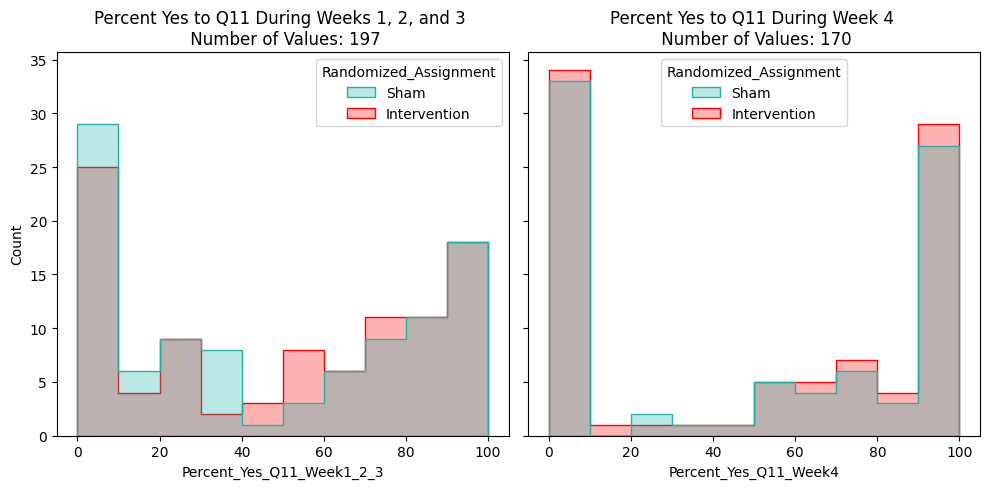

Weeks 1, 2, and 3 Data - Mann-Whitney U Test: p-value = 0.51
Week 4 Data - Mann-Whitney U Test: p-value = 0.88


,"Weeks 1, 2, and 3 - Sham","Weeks 1, 2, and 3 - Intervention",Week 4 - Sham,Week 4 - Intervention
n,100,97,82,88
Mean,45.68,49.65,49.24,50.43
Std,38.55,37.52,44.40,44.06
Median,37.8,50.0,50.0,63.3
Percent Greater than or Equal to 50%,47.00%,55.67%,54.88%,56.82%


In [ ]:

def weekComp(subset1, subset2):
    # Set up the figure and axes for a 1x2 grid of histograms
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    sham_full_color = 'lightseagreen'
    intervention_full_color = 'red'

    # create 10 bins
    bin_edges = np.arange(0, 101, 10)

    sns.histplot(
        data=df_full,
        x=subset1,
        hue='Randomized_Assignment',
        palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
        bins=bin_edges,
        ax=axes[0],
        element='step',
        alpha=0.3
    )

    count_vals = df_full[subset1].notna().sum()
    axes[0].set_title("Percent Yes to Q11 During Weeks 1, 2, and 3 \n Number of Values: " + str(count_vals))

    sns.histplot(
        data=df_full,
        x=subset2,
        hue='Randomized_Assignment',
        palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
        bins=bin_edges,
        ax=axes[1],
        element='step',
        alpha=0.3
    )
    count_vals = df_full[subset2].notna().sum()
    axes[1].set_title("Percent Yes to Q11 During Week 4 \n Number of Values: " + str(count_vals))
    plt.tight_layout()
    plt.show()

    # separate sham and intervention
    df_sham = df_full[df_full['Randomized_Assignment'] == 'Sham']
    df_intervention = df_full[df_full['Randomized_Assignment'] == 'Intervention']

    # n of each dataset
    n_data = ["n", df_sham[subset1].notna().sum(), df_intervention[subset1].notna().sum() ,df_sham[subset2].notna().sum(), df_intervention[subset2].notna().sum()]

    # mean of each dataset
    mean_data = ["Mean", f"{df_sham[subset1].mean():.2f}",f"{df_intervention[subset1].mean():.2f}", f"{df_sham[subset2].mean():.2f}", f"{df_intervention[subset2].mean():.2f}"]

    # std of each dataset
    std_data = ["Std", f"{df_sham[subset1].std():.2f}", f"{df_intervention[subset1].std():.2f}", f"{df_sham[subset2].std():.2f}", f"{df_intervention[subset2].std():.2f}"]

    # median of each dataset
    median_data = ["Median", f"{df_sham[subset1].median():.1f}", f"{df_intervention[subset1].median():.1f}", f"{df_sham[subset2].median():.1f}", f"{df_intervention[subset2].median():.1f}"]

    # percent greater than or equal to 50%
    sham_subset1_percent = (df_sham[subset1] >= 50).sum() / df_sham[subset1].notna().sum() *100
    intervention_subset1_percent = (df_intervention[subset1] >= 50).sum() / df_intervention[subset1].notna().sum() *100
    sham_subset2_percent = (df_sham[subset2] >= 50).sum() / df_sham[subset2].notna().sum() *100
    intervention_subset2_percent = (df_intervention[subset2] >= 50).sum() / df_intervention[subset2].notna().sum() *100
    percent_data = ["Percent Greater than or Equal to 50%", f"{sham_subset1_percent:.2f}%", f"{intervention_subset1_percent:.2f}%", f"{sham_subset2_percent:.2f}%", f"{intervention_subset2_percent:.2f}%"]


    # dropping na for p value calculations
    df_sham_s1_clean = df_sham.dropna(subset=[subset1])
    df_intervention_s1_clean = df_intervention.dropna(subset=[subset1])
    df_sham_s2_clean = df_sham.dropna(subset=[subset2])
    df_intervention_s2_clean = df_intervention.dropna(subset=[subset2])

    # p value
    u_stat_sub1, p_val_sub1 = mannwhitneyu(df_sham_s1_clean[subset1], df_intervention_s1_clean[subset1], alternative='two-sided')
    u_stat_sub2, p_val_sub2 = mannwhitneyu(df_sham_s2_clean[subset2], df_intervention_s2_clean[subset2], alternative='two-sided')
    print(f"Weeks 1, 2, and 3 Data - Mann-Whitney U Test: p-value = {p_val_sub1:.2f}")
    print(f"Week 4 Data - Mann-Whitney U Test: p-value = {p_val_sub2:.2f}")


    # combine data to one dataframe
    df_out = pd.DataFrame([n_data, mean_data, std_data, median_data, percent_data], columns = ["", "Weeks 1, 2, and 3 - Sham", "Weeks 1, 2, and 3 - Intervention", "Week 4 - Sham", "Week 4 - Intervention"])



    styled_df = (df_out.style.hide(axis="index").set_caption( " Statistics").set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
        {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
        ]))

    return styled_df


weekComp('Percent_Yes_Q11_Week1_2_3', 'Percent_Yes_Q11_Week4')

## Graphing % Yes only When Log and Reported Usage Line Up on that Day

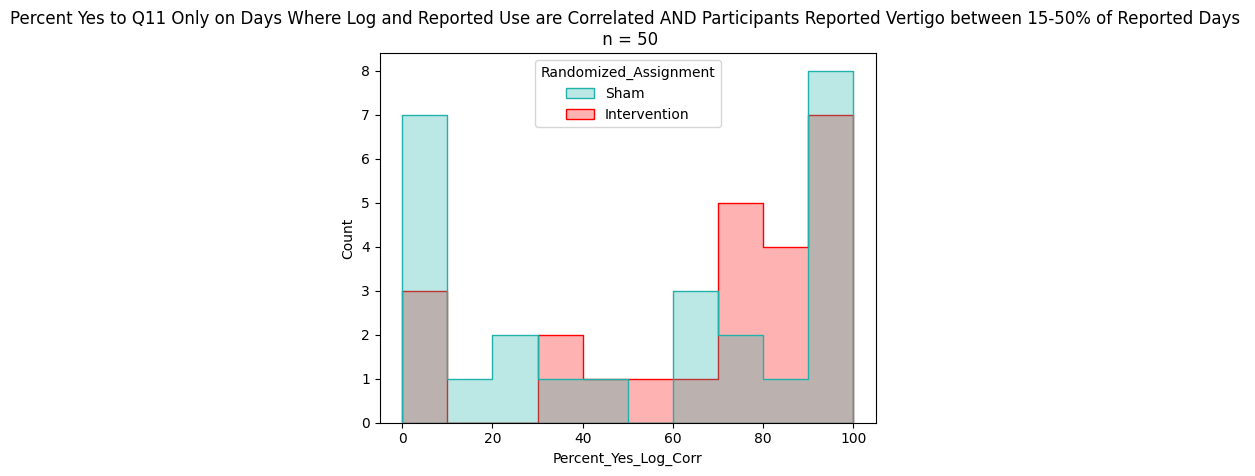

Mann-Whitney U Test: p-value = 0.20


,Sham,Intervention
n,26,24
Mean,52.34,68.90
Std,41.56,33.63
Median,63.3,76.4
Percent Greater than or Equal to 50%,53.85,75.00


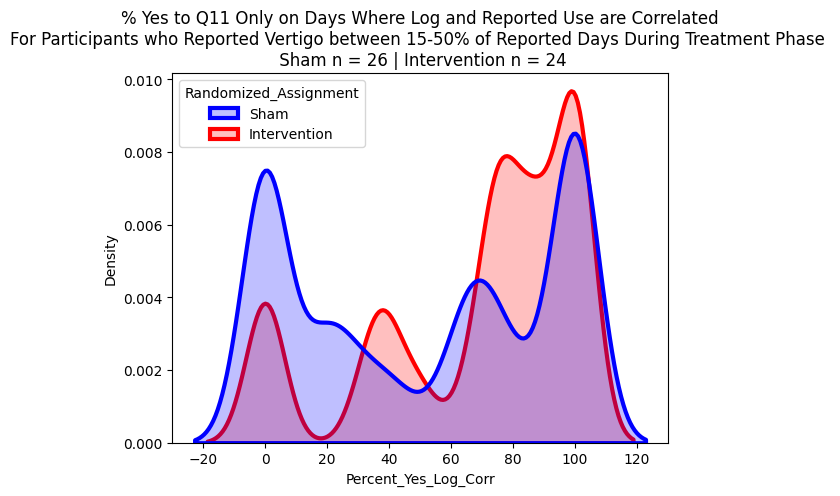

In [ ]:
# Define the columns for Q11 and Use Match
valid_days = [f'D{i}TSD_TreatmentDiary_Q11' for i in range(1, 29)]
use_match_days = [f'Use_Match_D{i}' for i in range(1, 29)]

def calculate_metrics(row):
    yes_count = 0
    yes_no_count = 0

    # Iterate over each day
    for q11_col, use_match_col in zip(valid_days, use_match_days):
        if row[use_match_col] == 1:  # Only consider days with Use Match = 1
            if row[q11_col] == "Yes":
                yes_count += 1
                yes_no_count += 1
            elif row[q11_col] == "No":
                yes_no_count += 1

    # Calculate the proportion (avoid division by zero)
    if yes_no_count == 0:
        yes_proportion = None
    else:
        yes_proportion = yes_count / yes_no_count *100

    return yes_proportion, yes_count

# Step 2: Apply the function and extract both yes_proportion and yes_count
df_full[['Percent_Yes_Log_Corr', 'Count_Yes_Log_Corr']] = df_full.apply(
    lambda row: pd.Series(calculate_metrics(row)),
    axis=1
)

#print(df_full[['SubjectID','Percent_Yes_Log_Corr']].head(20))

# Graph Percent Yes
sham_full_color = 'lightseagreen'
intervention_full_color = 'red'

#df_cut = df_full[(df_full['Treatment_Percent_Confirmed_Vertigo'] > 15) & (df_full['Treatment_Percent_Confirmed_Vertigo'] < 50) & (df_full['Mean_Reported_Use_Time'] >= 15)]
df_cut = df_full[(df_full['Treatment_Percent_Confirmed_Vertigo'] > 15) & (df_full['Treatment_Percent_Confirmed_Vertigo'] < 50)]
#df_cut = df_full[(df_full['Treatment_Percent_Confirmed_Vertigo'] < 50)]
#df_cut = df_full[(df_full['Treatment_Percent_Confirmed_Vertigo'] > 15) & (df_full['Treatment_Percent_Confirmed_Vertigo'] < 50) & (df_full['Log_Mean_Daily_Session_Time'] >= 15)]
#df_cut = df_full

# create 10 bins
bin_edges = np.arange(0, 101, 10)
count_vals = df_cut['Percent_Yes_Log_Corr'].notna().sum()
sns.histplot(
    data=df_cut,
    x='Percent_Yes_Log_Corr',
    hue='Randomized_Assignment',
    palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
    bins=bin_edges,
    element='step',
    alpha=0.3
).set_title("Percent Yes to Q11 Only on Days Where Log and Reported Use are Correlated AND Participants Reported Vertigo between 15-50% of Reported Days \n n = " + str(count_vals))

df_sham = df_cut[df_cut['Randomized_Assignment'] == 'Sham']
df_intervention = df_cut[df_cut['Randomized_Assignment'] == 'Intervention']

n_data = ["n", df_sham['Percent_Yes_Log_Corr'].notna().sum(), df_intervention['Percent_Yes_Log_Corr'].notna().sum()]
mean_data = ["Mean", f"{df_sham['Percent_Yes_Log_Corr'].mean():.2f}", f"{df_intervention['Percent_Yes_Log_Corr'].mean():.2f}"]
std_data = ["Std", f"{df_sham['Percent_Yes_Log_Corr'].std():.2f}", f"{df_intervention['Percent_Yes_Log_Corr'].std():.2f}"]
median_data = ["Median", f"{df_sham['Percent_Yes_Log_Corr'].median():.1f}", f"{df_intervention['Percent_Yes_Log_Corr'].median():.1f}"]

sham_percent = (df_sham['Percent_Yes_Log_Corr'] >= 50).sum() / df_sham['Percent_Yes_Log_Corr'].notna().sum() *100
intervention_percent = (df_intervention['Percent_Yes_Log_Corr'] >= 50).sum() / df_intervention['Percent_Yes_Log_Corr'].notna().sum() *100
percent_data = ["Percent Greater than or Equal to 50%", f"{sham_percent:.2f}", f"{intervention_percent:.2f}"]

# combine data to one dataframe
df_out = pd.DataFrame([n_data, mean_data, std_data, median_data, percent_data], columns = ["", "Sham", "Intervention"])


styled_df = (df_out.style.hide(axis="index").set_caption( " Statistics").set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
    {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
    ]))

plt.show()
df_sham_clean = df_sham.dropna(subset=['Percent_Yes_Log_Corr'])
df_intervention_clean = df_intervention.dropna(subset=['Percent_Yes_Log_Corr'])
u_stat, p_val = mannwhitneyu(df_sham_clean['Percent_Yes_Log_Corr'], df_intervention_clean['Percent_Yes_Log_Corr'], alternative='two-sided')
print(f"Mann-Whitney U Test: p-value = {p_val:.2f}")
display(styled_df)

#plt.set_title("Percent Yes to Q11 Only on Days Where Log and Reported Use are Correlated \n Number of Values: " + str(count_vals))

kdeplot(df_cut[df_cut['Percent_Yes_Log_Corr'].notna()], 'Percent_Yes_Log_Corr', "% Yes to Q11 Only on Days Where Log and Reported Use are Correlated", "For Participants who Reported Vertigo between 15-50% of Reported Days During Treatment Phase")
#kdeplot(df_cut[df_cut['Percent_Yes_Log_Corr'].notna()], 'Percent_Yes_Log_Corr', "% Yes to Q11 Only on Days Where Log and Reported Use are Correlated


## Graphing % Yes only when Participant Reported they Used the Device Early in the Episode

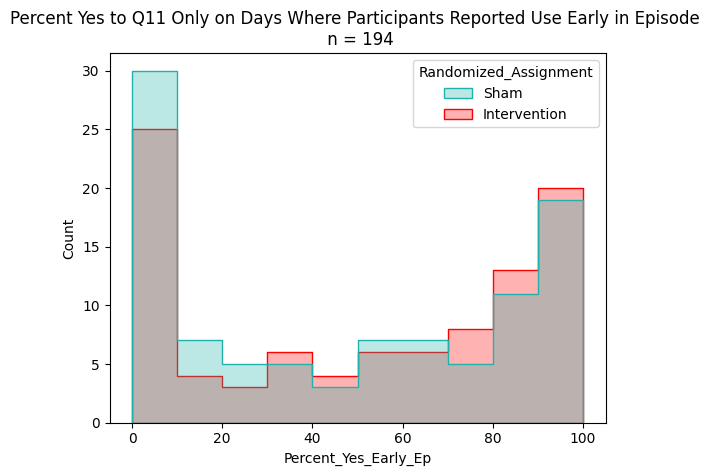

Mann-Whitney U Test: p-value = 0.21


,Sham,Intervention
n,99,95
Mean,45.59,52.11
Std,38.87,38.59
Median,42.9,57.1
Percent Greater than or Equal to 50%,49.49,55.79


In [ ]:
# reusing code from previous block with below changes
# replacing Use_Match column with TSD Q7
# use_match_days replace with applied_time
# use_match_col replace with q7_col
# look for when q7_col is "Early in the episode"
# change name of output columns

# Define the columns for Q11 and Time of Treatment
valid_days = [f'D{i}TSD_TreatmentDiary_Q11' for i in range(1, 29)]
applied_time = [f'D{i}TSD_TreatmentDiary_Q7' for i in range(1, 29)] # When I expected a vertigo episode, Early in the episode, Late in the episode

def calculate_metrics(row):
    yes_count = 0
    yes_no_count = 0

    # Iterate over each day
    for q11_col, q7_col in zip(valid_days, applied_time):
        if row[q7_col] == "Early in the episode":  # Only consider days with q7 is early in episode
            if row[q11_col] == "Yes":
                yes_count += 1
                yes_no_count += 1
            elif row[q11_col] == "No":
                yes_no_count += 1

    # Calculate the proportion (avoid division by zero)
    if yes_no_count == 0:
        yes_proportion = None
    else:
        yes_proportion = yes_count / yes_no_count *100

    return yes_proportion, yes_count

# Apply the function and extract both yes_proportion and yes_count
df_full[['Percent_Yes_Early_Ep', 'Count_Yes_Early_Ep']] = df_full.apply(
    lambda row: pd.Series(calculate_metrics(row)),
    axis=1
)


# Graph Percent Yes
sham_full_color = 'lightseagreen'
intervention_full_color = 'red'

df_cut = df_full
# redefine df_cut here if additional cuts are needed
#df_cut = df_full[df_full['Log_Count_Unique_Days_Used'] > 3]


# create 10 bins
bin_edges = np.arange(0, 101, 10)
# number of values not NaN
count_vals = df_cut['Percent_Yes_Early_Ep'].notna().sum()
# graph
sns.histplot(
    data=df_cut,
    x='Percent_Yes_Early_Ep',
    hue='Randomized_Assignment',
    palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
    bins=bin_edges,
    element='step',
    alpha=0.3
).set_title("Percent Yes to Q11 Only on Days Where Participants Reported Use Early in Episode \n n = " + str(count_vals))

# cut to sham and intervention for statistics
df_sham = df_cut[df_cut['Randomized_Assignment'] == 'Sham']
df_intervention = df_cut[df_cut['Randomized_Assignment'] == 'Intervention']

# define statistics
n_data = ["n", df_sham['Percent_Yes_Early_Ep'].notna().sum(), df_intervention['Percent_Yes_Early_Ep'].notna().sum()]
mean_data = ["Mean", f"{df_sham['Percent_Yes_Early_Ep'].mean():.2f}", f"{df_intervention['Percent_Yes_Early_Ep'].mean():.2f}"]
std_data = ["Std", f"{df_sham['Percent_Yes_Early_Ep'].std():.2f}", f"{df_intervention['Percent_Yes_Early_Ep'].std():.2f}"]
median_data = ["Median", f"{df_sham['Percent_Yes_Early_Ep'].median():.1f}", f"{df_intervention['Percent_Yes_Early_Ep'].median():.1f}"]

sham_percent = (df_sham['Percent_Yes_Early_Ep'] >= 50).sum() / df_sham['Percent_Yes_Early_Ep'].notna().sum() *100
intervention_percent = (df_intervention['Percent_Yes_Early_Ep'] >= 50).sum() / df_intervention['Percent_Yes_Early_Ep'].notna().sum() *100
percent_data = ["Percent Greater than or Equal to 50%", f"{sham_percent:.2f}", f"{intervention_percent:.2f}"]

# combine statistics to one dataframe
df_out = pd.DataFrame([n_data, mean_data, std_data, median_data, percent_data], columns = ["", "Sham", "Intervention"])

# style statistics
styled_df = (df_out.style.hide(axis="index").set_caption( " Statistics").set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
    {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
    ]))

# output
plt.show()
# remove nan values for p value calculation
df_sham_clean = df_sham.dropna(subset=['Percent_Yes_Early_Ep'])
df_intervention_clean = df_intervention.dropna(subset=['Percent_Yes_Early_Ep'])
u_stat, p_val = mannwhitneyu(df_sham_clean['Percent_Yes_Early_Ep'], df_intervention_clean['Percent_Yes_Early_Ep'], alternative='two-sided')
print(f"Mann-Whitney U Test: p-value = {p_val:.2f}")
display(styled_df)

#print(df_full[['Percent_Yes_Q11', 'Percent_Yes_Log_Corr', 'Percent_Yes_Early_Ep']])

## Graphing % Yes only when Participant Reported Episode was Low Severity

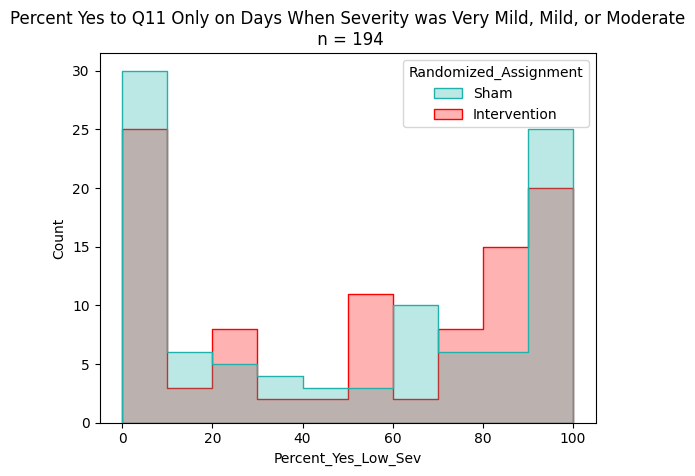

Mann-Whitney U Test: p-value = 0.39


,Sham,Intervention
n,98,96
Mean,47.71,52.30
Std,40.08,38.80
Median,50.0,55.6
Percent Greater than or Equal to 50%,51.02,58.33


In [ ]:
# reusing code from previous block with below changes
# replacing Use_Match column with TSD Q3
# use_match_days replace with severity
# use_match_col replace with q3_col
# look for when q7_col is at certain severity levels
# change name of output columns

# Define the columns for Q11 and Time of Treatment
valid_days = [f'D{i}TSD_TreatmentDiary_Q11' for i in range(1, 29)]
severity = [f'D{i}TSD_TreatmentDiary_Q3' for i in range(1, 29)] # Very mild, Mild, Moderate: interfered with, but did <b>not</b> prohibit daily activities, Severe, Very severe

def calculate_metrics(row):
    yes_count = 0
    yes_no_count = 0

    severity_consider = ["Very mild", "Mild", "Moderate: interfered with, but did <b>not</b> prohibit daily activities"]

    # Iterate over each day
    for q11_col, q3_col in zip(valid_days, severity):
        if row[q3_col] in severity_consider:  # Only consider severity levels in list above
            if row[q11_col] == "Yes":
                yes_count += 1
                yes_no_count += 1
            elif row[q11_col] == "No":
                yes_no_count += 1

    # Calculate the proportion (avoid division by zero)
    if yes_no_count == 0:
        yes_proportion = None
    else:
        yes_proportion = yes_count / yes_no_count *100

    return yes_proportion, yes_count

# Apply the function and extract both yes_proportion and yes_count
df_full[['Percent_Yes_Low_Sev', 'Count_Yes_Low_Sev']] = df_full.apply(
    lambda row: pd.Series(calculate_metrics(row)),
    axis=1
)


# Graph Percent Yes
sham_full_color = 'lightseagreen'
intervention_full_color = 'red'

df_cut = df_full
# redefine df_cut here if additional cuts are needed
#df_cut = df_full[df_full['Log_Count_Unique_Days_Used'] > 3]


# create 10 bins
bin_edges = np.arange(0, 101, 10)
# number of values not NaN
count_vals = df_cut['Percent_Yes_Low_Sev'].notna().sum()
# graph
sns.histplot(
    data=df_cut,
    x='Percent_Yes_Low_Sev',
    hue='Randomized_Assignment',
    palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
    bins=bin_edges,
    element='step',
    alpha=0.3
).set_title("Percent Yes to Q11 Only on Days When Severity was Very Mild, Mild, or Moderate\n n = " + str(count_vals))

# cut to sham and intervention for statistics
df_sham = df_cut[df_cut['Randomized_Assignment'] == 'Sham']
df_intervention = df_cut[df_cut['Randomized_Assignment'] == 'Intervention']

# define statistics
n_data = ["n", df_sham['Percent_Yes_Low_Sev'].notna().sum(), df_intervention['Percent_Yes_Low_Sev'].notna().sum()]
mean_data = ["Mean", f"{df_sham['Percent_Yes_Low_Sev'].mean():.2f}", f"{df_intervention['Percent_Yes_Low_Sev'].mean():.2f}"]
std_data = ["Std", f"{df_sham['Percent_Yes_Low_Sev'].std():.2f}", f"{df_intervention['Percent_Yes_Low_Sev'].std():.2f}"]
median_data = ["Median", f"{df_sham['Percent_Yes_Low_Sev'].median():.1f}", f"{df_intervention['Percent_Yes_Low_Sev'].median():.1f}"]

sham_percent = (df_sham['Percent_Yes_Low_Sev'] >= 50).sum() / df_sham['Percent_Yes_Low_Sev'].notna().sum() *100
intervention_percent = (df_intervention['Percent_Yes_Low_Sev'] >= 50).sum() / df_intervention['Percent_Yes_Low_Sev'].notna().sum() *100
percent_data = ["Percent Greater than or Equal to 50%", f"{sham_percent:.2f}", f"{intervention_percent:.2f}"]

# combine statistics to one dataframe
df_out = pd.DataFrame([n_data, mean_data, std_data, median_data, percent_data], columns = ["", "Sham", "Intervention"])

# style statistics
styled_df = (df_out.style.hide(axis="index").set_caption( " Statistics").set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
    {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
    ]))

# output
plt.show()
# remove nan values for p value calculation
df_sham_clean = df_sham.dropna(subset=['Percent_Yes_Low_Sev'])
df_intervention_clean = df_intervention.dropna(subset=['Percent_Yes_Low_Sev'])
u_stat, p_val = mannwhitneyu(df_sham_clean['Percent_Yes_Low_Sev'], df_intervention_clean['Percent_Yes_Low_Sev'], alternative='two-sided')
print(f"Mann-Whitney U Test: p-value = {p_val:.2f}")
display(styled_df)

## Graphing % Yes without days when Sham participants used rescue medications


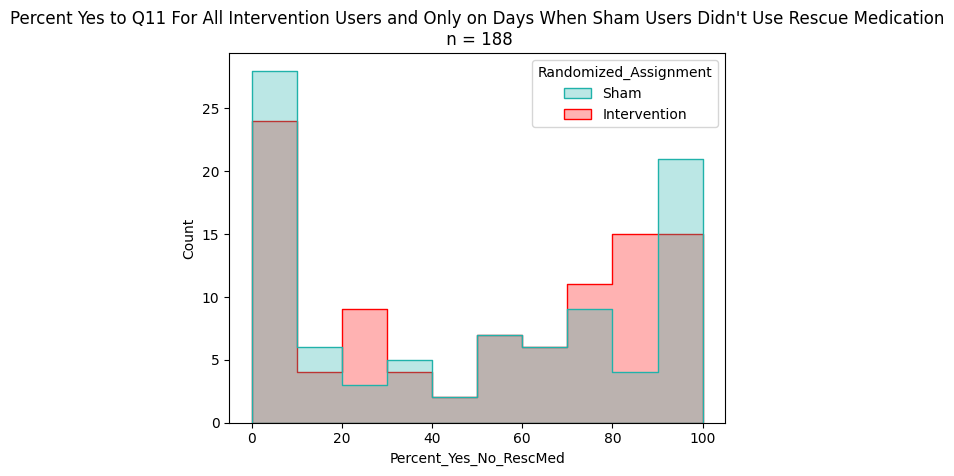

Mann-Whitney U Test: p-value = 0.39


,Sham,Intervention
n,91,97
Mean,45.80,50.09
Std,39.14,37.09
Median,50.0,55.6
Percent Greater than or Equal to 50%,51.65,55.67


In [ ]:
# reusing code from previous block with below changes
# replacing Use_Match column with TSD Q5
# use_match_days replace with severity
# use_match_col replace with q3_col
# look for when q7_col is at certain severity levels

# add logic to separate intervention and sham groups

# change name of output columns


# Define the columns for Q11 and Time of Treatment
valid_days = [f'D{i}TSD_TreatmentDiary_Q11' for i in range(1, 29)]
rescue_med = [f'D{i}TSD_TreatmentDiary_Q5' for i in range(1, 29)] # Did you use a rescue med, yes or no?

def calculate_metrics(row):
    yes_count = 0
    yes_no_count = 0

    # Iterate over each day
    for q11_col, q5_col in zip(valid_days, rescue_med):
        # for intervention, use existing calculation of percent and count q11
        if row["Randomized_Assignment"] == "Intervention":
            yes_proportion = row["Percent_Yes_Q11"]
            yes_no_count = row["Count_Yes_Q11"]
        # for sham, use logic from past blocks to only consider days when q5 answer is No
        elif row["Randomized_Assignment"] == "Sham":
            if row[q5_col] == "No":  # Only consider when they did not use a rescue med. Hidden dont matter b/c Q11 would also be hidden. Ignore blanks
                if row[q11_col] == "Yes":
                    yes_count += 1
                    yes_no_count += 1
                elif row[q11_col] == "No":
                    yes_no_count += 1

    # Calculate the proportion (avoid division by zero)
    # Calculation only needed if Sham row
    if row["Randomized_Assignment"] == "Sham":
        if yes_no_count == 0:
            yes_proportion = None
        else:
            yes_proportion = yes_count / yes_no_count *100

    return yes_proportion, yes_count

# Apply the function and extract both yes_proportion and yes_count
df_full[['Percent_Yes_No_RescMed', 'Count_Yes_No_RescMed']] = df_full.apply(
    lambda row: pd.Series(calculate_metrics(row)),
    axis=1
)


# Graph Percent Yes
sham_full_color = 'lightseagreen'
intervention_full_color = 'red'

df_cut = df_full
# redefine df_cut here if additional cuts are needed
#df_cut = df_full[df_full['Log_Count_Unique_Days_Used'] > 3]


# create 10 bins
bin_edges = np.arange(0, 101, 10)
# number of values not NaN
count_vals = df_cut['Percent_Yes_No_RescMed'].notna().sum()
# graph
sns.histplot(
    data=df_cut,
    x='Percent_Yes_No_RescMed',
    hue='Randomized_Assignment',
    palette={'Sham': sham_full_color, 'Intervention': intervention_full_color},
    bins=bin_edges,
    element='step',
    alpha=0.3
).set_title("Percent Yes to Q11 For All Intervention Users and Only on Days When Sham Users Didn't Use Rescue Medication\n n = " + str(count_vals))

# cut to sham and intervention for statistics
df_sham = df_cut[df_cut['Randomized_Assignment'] == 'Sham']
df_intervention = df_cut[df_cut['Randomized_Assignment'] == 'Intervention']

# define statistics
n_data = ["n", df_sham['Percent_Yes_No_RescMed'].notna().sum(), df_intervention['Percent_Yes_No_RescMed'].notna().sum()]
mean_data = ["Mean", f"{df_sham['Percent_Yes_No_RescMed'].mean():.2f}", f"{df_intervention['Percent_Yes_No_RescMed'].mean():.2f}"]
std_data = ["Std", f"{df_sham['Percent_Yes_No_RescMed'].std():.2f}", f"{df_intervention['Percent_Yes_No_RescMed'].std():.2f}"]
median_data = ["Median", f"{df_sham['Percent_Yes_No_RescMed'].median():.1f}", f"{df_intervention['Percent_Yes_No_RescMed'].median():.1f}"]

sham_percent = (df_sham['Percent_Yes_No_RescMed'] >= 50).sum() / df_sham['Percent_Yes_No_RescMed'].notna().sum() *100
intervention_percent = (df_intervention['Percent_Yes_No_RescMed'] >= 50).sum() / df_intervention['Percent_Yes_No_RescMed'].notna().sum() *100
percent_data = ["Percent Greater than or Equal to 50%", f"{sham_percent:.2f}", f"{intervention_percent:.2f}"]

# combine statistics to one dataframe
df_out = pd.DataFrame([n_data, mean_data, std_data, median_data, percent_data], columns = ["", "Sham", "Intervention"])

# style statistics
styled_df = (df_out.style.hide(axis="index").set_caption( " Statistics").set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
    {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
    ]))

# output
plt.show()
# remove nan values for p value calculation
df_sham_clean = df_sham.dropna(subset=['Percent_Yes_No_RescMed'])
df_intervention_clean = df_intervention.dropna(subset=['Percent_Yes_No_RescMed'])
u_stat, p_val = mannwhitneyu(df_sham_clean['Percent_Yes_No_RescMed'], df_intervention_clean['Percent_Yes_No_RescMed'], alternative='two-sided')
print(f"Mann-Whitney U Test: p-value = {p_val:.2f}")
display(styled_df)

# Correlation

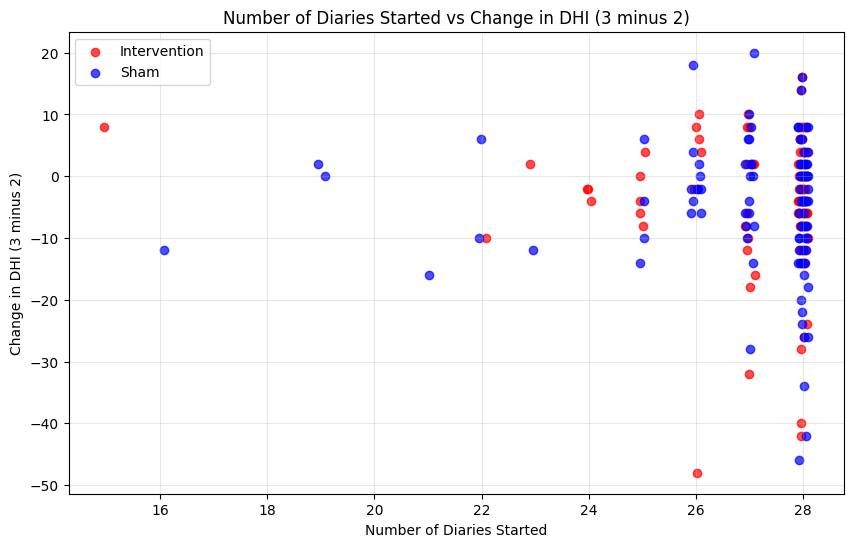

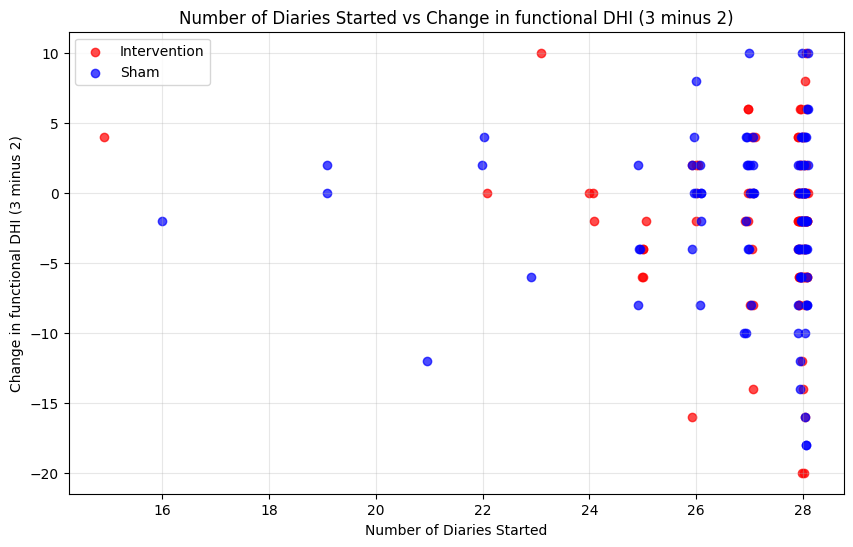

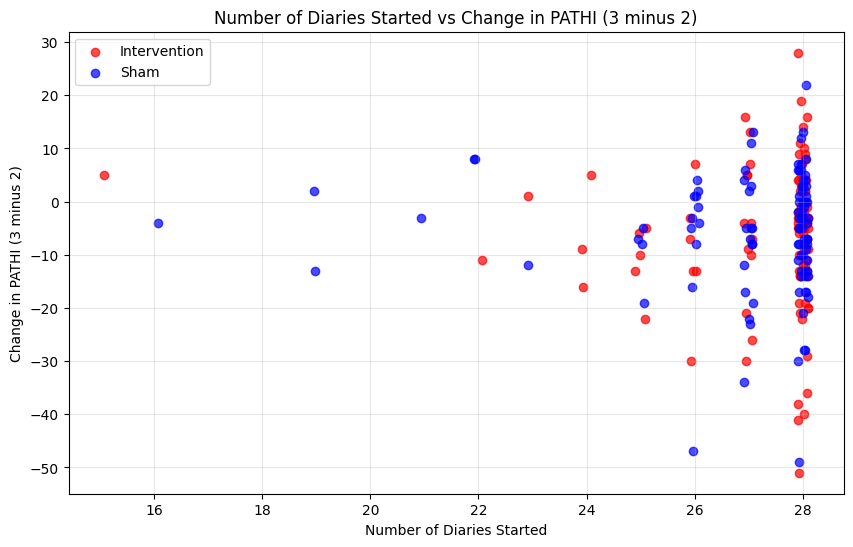

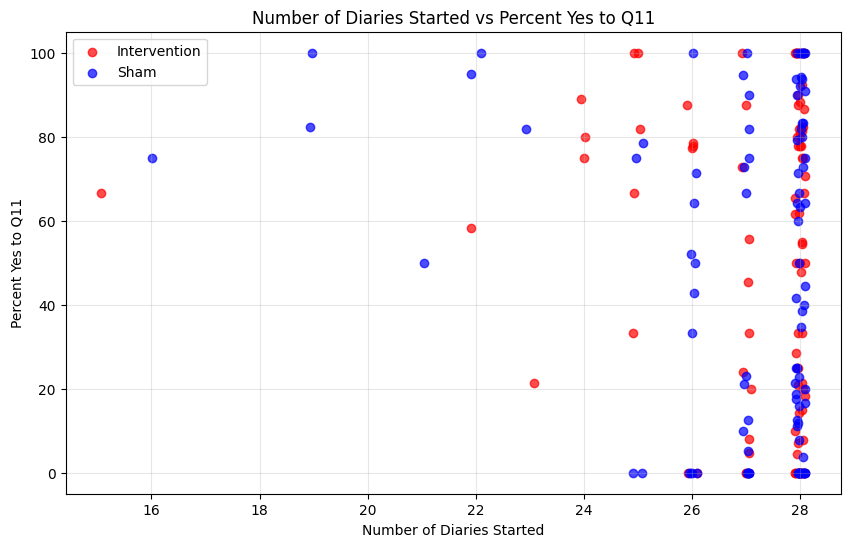

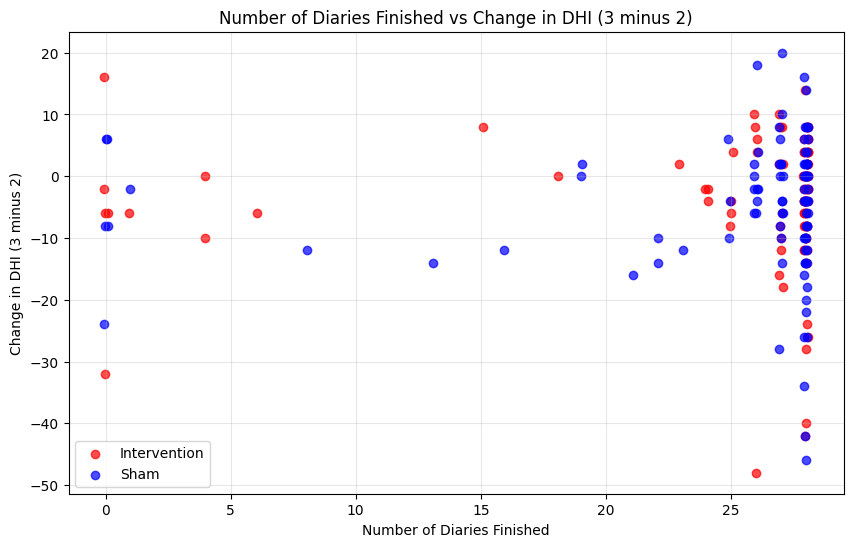

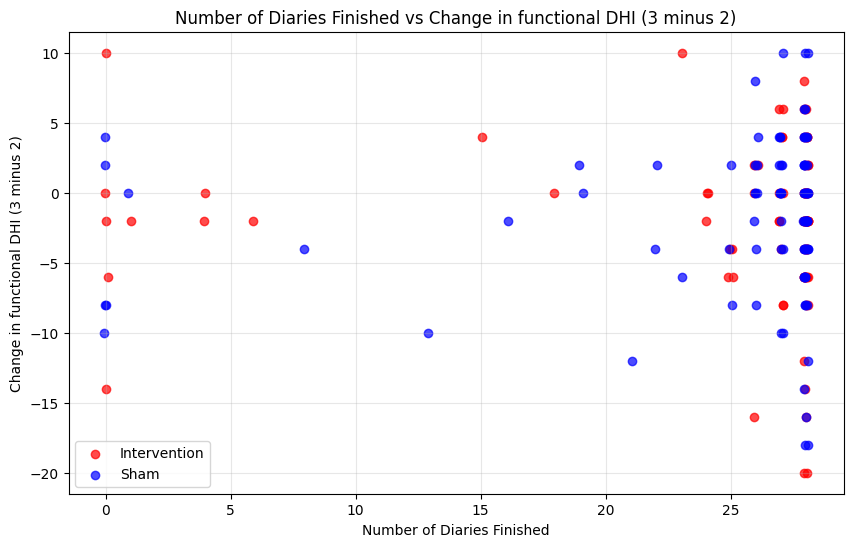

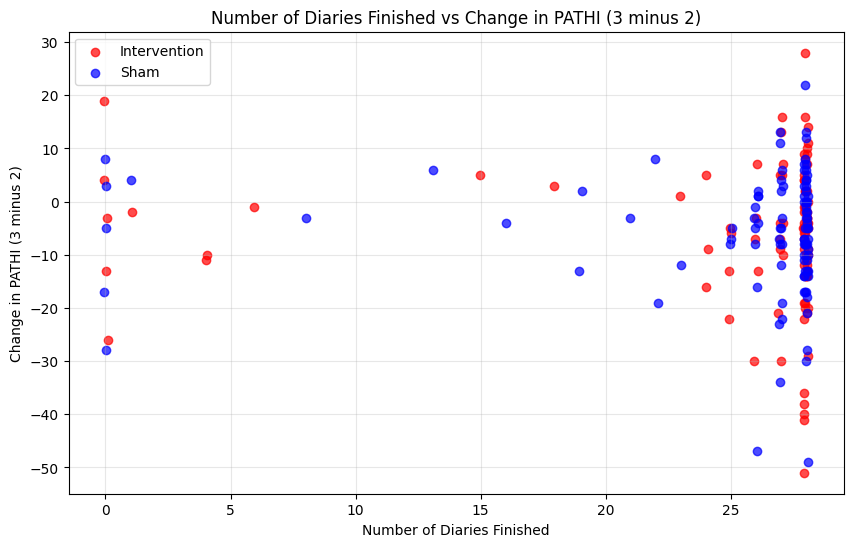

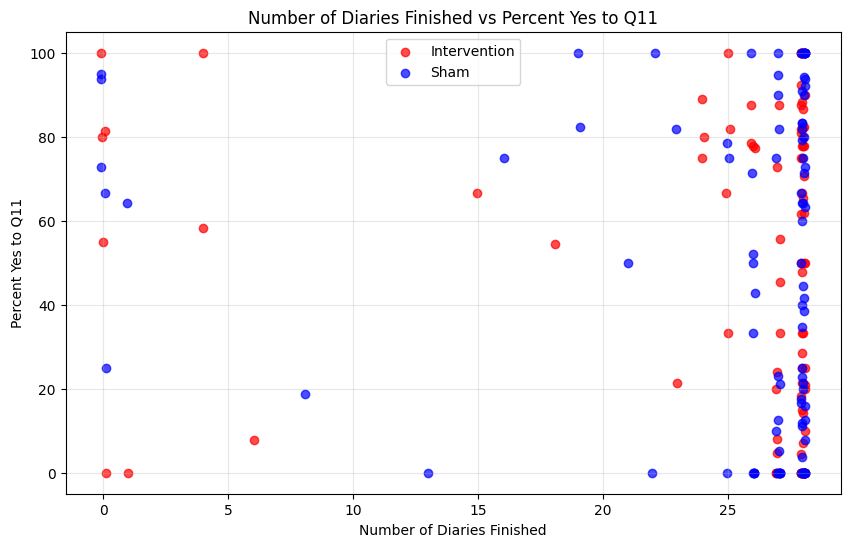

Number of Diaries Finished,<25,25,26,27,28
n,30,7,15,29,116
Mean,59.81,62.20,44.73,29.82,48.94
Stdev,34.37,34.08,36.95,35.43,38.20


In [ ]:

def scatPlot(df, count, param, xlab, ylab):
    # Set a jitter factor
    jitter_factor = 0.1

    # Add jittered scatter plot
    plt.figure(figsize=(10, 6))

    # Intervention group
    x_intervention = df[df['Randomized_Assignment'] == 'Intervention'][count]
    y_intervention = df[df['Randomized_Assignment'] == 'Intervention'][param]
    plt.scatter(
        x_intervention + np.random.uniform(-jitter_factor, jitter_factor, size=len(x_intervention)),
        y_intervention, # + np.random.uniform(-jitter_factor, jitter_factor, size=len(y_intervention)),
        color='red',
        label='Intervention',
        alpha=0.7
    )

    # Sham group
    x_sham = df[df['Randomized_Assignment'] == 'Sham'][count]
    y_sham = df[df['Randomized_Assignment'] == 'Sham'][param]
    plt.scatter(
        x_sham + np.random.uniform(-jitter_factor, jitter_factor, size=len(x_sham)),
        y_sham, #+ np.random.uniform(-jitter_factor, jitter_factor, size=len(y_sham)),
        color='blue',
        label='Sham',
        alpha=0.7
    )

    # Add labels, title, and legend
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(xlab + " vs " + ylab)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# table for Count_TSD_Started
def sumTableStart(df, param):
    # count n for groups less than 24, 25, 26, 27, 28
    n1 = (df_full[(df_full['Count_TSD_Started'] <= 24)]).shape[0]
    n2 = (df_full[(df_full['Count_TSD_Started'] == 25)]).shape[0]
    n3 = (df_full[(df_full['Count_TSD_Started'] == 26)]).shape[0]
    n4 = (df_full[(df_full['Count_TSD_Started'] == 27)]).shape[0]
    n5 = (df_full[(df_full['Count_TSD_Started'] == 28)]).shape[0]

    # means for groups less than 24, 25, 26, 27, 28
    m1 = df_full[(df_full['Count_TSD_Started'] <= 24)][param].mean()
    m2 = df_full[(df_full['Count_TSD_Started'] == 25)][param].mean()
    m3 = df_full[(df_full['Count_TSD_Started'] == 26)][param].mean()
    m4 = df_full[(df_full['Count_TSD_Started'] == 27)][param].mean()
    m5 = df_full[(df_full['Count_TSD_Started'] == 28)][param].mean()

    # stdev for groups less than 24, 25, 26, 27, 28
    sd1 = df_full[(df_full['Count_TSD_Started'] <= 24)][param].std()
    sd2 = df_full[(df_full['Count_TSD_Started'] == 25)][param].std()
    sd3 = df_full[(df_full['Count_TSD_Started'] == 26)][param].std()
    sd4 = df_full[(df_full['Count_TSD_Started'] == 27)][param].std()
    sd5 = df_full[(df_full['Count_TSD_Started'] == 28)][param].std()

    n = ["n", f"{n1:.0f}", f"{n2:.0f}", f"{n3:.0f}", f"{n4:.0f}", f"{n5:.0f}"]
    mean = ["Mean", f"{m1:.2f}", f"{m2:.2f}", f"{m3:.2f}", f"{m4:.2f}", f"{m5:.2f}"]
    std = ["Stdev", f"{sd1:.2f}", f"{sd2:.2f}", f"{sd3:.2f}", f"{sd4:.2f}", f"{sd5:.2f}"]

    df_out = pd.DataFrame([n, mean, std], columns = ["Number of Diaries Started", "<25", "25", "26", "27", "28"])
    styled_df = (df_out.style.hide(axis="index").set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
    {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
    ]))

    return styled_df

# table for Count_TSD_Finished
def sumTableFinish(df, param):
    # count n for groups less than 24, 25, 26, 27, 28
    n1 = (df_full[(df_full['Count_TSD_Finished'] <= 24)]).shape[0]
    n2 = (df_full[(df_full['Count_TSD_Finished'] == 25)]).shape[0]
    n3 = (df_full[(df_full['Count_TSD_Finished'] == 26)]).shape[0]
    n4 = (df_full[(df_full['Count_TSD_Finished'] == 27)]).shape[0]
    n5 = (df_full[(df_full['Count_TSD_Finished'] == 28)]).shape[0]

    # means for groups less than 24, 25, 26, 27, 28
    m1 = df_full[(df_full['Count_TSD_Finished'] <= 24)][param].mean()
    m2 = df_full[(df_full['Count_TSD_Finished'] == 25)][param].mean()
    m3 = df_full[(df_full['Count_TSD_Finished'] == 26)][param].mean()
    m4 = df_full[(df_full['Count_TSD_Finished'] == 27)][param].mean()
    m5 = df_full[(df_full['Count_TSD_Finished'] == 28)][param].mean()

    # stdev for groups less than 24, 25, 26, 27, 28
    sd1 = df_full[(df_full['Count_TSD_Finished'] <= 24)][param].std()
    sd2 = df_full[(df_full['Count_TSD_Finished'] == 25)][param].std()
    sd3 = df_full[(df_full['Count_TSD_Finished'] == 26)][param].std()
    sd4 = df_full[(df_full['Count_TSD_Finished'] == 27)][param].std()
    sd5 = df_full[(df_full['Count_TSD_Finished'] == 28)][param].std()

    n = ["n", f"{n1:.0f}", f"{n2:.0f}", f"{n3:.0f}", f"{n4:.0f}", f"{n5:.0f}"]
    mean = ["Mean", f"{m1:.2f}", f"{m2:.2f}", f"{m3:.2f}", f"{m4:.2f}", f"{m5:.2f}"]
    std = ["Stdev", f"{sd1:.2f}", f"{sd2:.2f}", f"{sd3:.2f}", f"{sd4:.2f}", f"{sd5:.2f}"]

    df_out = pd.DataFrame([n, mean, std], columns = ["Number of Diaries Finished", "<25", "25", "26", "27", "28"])
    styled_df = (df_out.style.hide(axis="index").set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]},  # Cell borders
    {'selector': 'th', 'props': [('border-left', '1px solid black'), ('border-right', '1px solid black')]}
    ]))

    return styled_df

scatPlot(df_full, 'Count_TSD_Started', 'W_DHI_23', "Number of Diaries Started", "Change in DHI (3 minus 2)")
sumTableStart(df_full, 'W_DHI_23')
scatPlot(df_full, 'Count_TSD_Started', 'W_DHI_f_23', "Number of Diaries Started", "Change in functional DHI (3 minus 2)")
sumTableStart(df_full, 'W_DHI_f_23')
scatPlot(df_full, 'Count_TSD_Started', 'Delta_PATHI23', "Number of Diaries Started", "Change in PATHI (3 minus 2)")
sumTableStart(df_full, 'Delta_PATHI23')
scatPlot(df_full, 'Count_TSD_Started', 'Percent_Yes_Q11', "Number of Diaries Started", "Percent Yes to Q11")
sumTableStart(df_full, 'Percent_Yes_Q11')

scatPlot(df_full, 'Count_TSD_Finished', 'W_DHI_23', "Number of Diaries Finished", "Change in DHI (3 minus 2)")
sumTableFinish(df_full, 'W_DHI_23')
scatPlot(df_full, 'Count_TSD_Finished', 'W_DHI_f_23', "Number of Diaries Finished", "Change in functional DHI (3 minus 2)")
sumTableFinish(df_full, 'W_DHI_f_23')
scatPlot(df_full, 'Count_TSD_Finished', 'Delta_PATHI23', "Number of Diaries Finished", "Change in PATHI (3 minus 2)")
sumTableFinish(df_full, 'Delta_PATHI23')
scatPlot(df_full, 'Count_TSD_Finished', 'Percent_Yes_Q11', "Number of Diaries Finished", "Percent Yes to Q11")
sumTableFinish(df_full, 'Percent_Yes_Q11')

In [ ]:
filtered_df = df_full[(df_full['Percent_Yes_Log_Corr'] == 100) & (df_full['Randomized_Assignment'] == 'Sham')]
print(filtered_df[['SubjectID', 'Randomized_Assignment', 'Percent_Yes_Log_Corr']])

    SubjectID Randomized_Assignment  Percent_Yes_Log_Corr
16   EARM-015                  Sham                 100.0
17   EARM-024                  Sham                 100.0
25   EARM-168                  Sham                 100.0
46   IRVN-028                  Sham                 100.0
56   MUSC-029                  Sham                 100.0
66   NEUR-007                  Sham                 100.0
84   ONLM-081                  Sham                 100.0
100  ONLM-275                  Sham                 100.0
104  ONLM-396                  Sham                 100.0
116  ONLM-577                  Sham                 100.0
118  ONLM-661                  Sham                 100.0
119  ONLM-671                  Sham                 100.0
129  ONLN-341                  Sham                 100.0
130  ONLO-003                  Sham                 100.0
131  ONLO-007                  Sham                 100.0
145  ONLV-032                  Sham                 100.0
150  ONLV-079 

# Sandbox

In [ ]:
# Update the function to include the ability to print the sample size (n) of the best subset
df = df_full

def optimize_p_1(df, score_col, criteria1_col, crit1_name, min_n=70):
    best_p = 1  # Start with the highest possible p-value
    best_subset = None
    best_n = 0  # Store the sample size of the best subset

    # Iterate through all possible combinations of PATHI1_Q10_SCORE values
    unique_crit1 = sorted(df[criteria1_col].unique())
    #print(unique_crit1)
    for subset in range(1, 2**len(unique_crit1)):
        # Generate subset mask based on binary representation of subset
        crit1_include = [unique_crit1[i] for i in range(len(unique_crit1)) if (subset >> i) & 1]
        #print(crit1_include)
        filtered_df = df[df[criteria1_col].isin(crit1_include)]

        # Check if sample size condition is met
        if len(filtered_df) >= min_n:
            # Perform Mann-Whitney U test
            group_sham = filtered_df[filtered_df['Randomized_Assignment'] == "Sham"][score_col]
            group_intervention = filtered_df[filtered_df['Randomized_Assignment'] == "Intervention"][score_col]

            if len(group_sham) > 0 and len(group_intervention) > 0:
                _, p_value = mannwhitneyu(group_sham, group_intervention, alternative='two-sided')
                # Update best p-value, subset, and sample size if current p-value is smaller
                if p_value < best_p:
                    best_p = p_value
                    best_subset = {crit1_name: crit1_include}
                    best_n = len(filtered_df)

    return best_subset, best_p, best_n

# Run the updated optimization function
best_subset, best_p_value, best_n = optimize_p_1(
    df,
    score_col="W_DHI_23",
    criteria1_col="BaselineWrapUp_BaselineWrapUp_Q19",
    crit1_name = "Most Bothersome Symptom",
    min_n=70
)

best_subset, best_p_value, best_n


({'Most Bothersome Symptom': ["Dizziness: feeling like you can't tell where you are in space, but not feeling like you or things around you are moving",
   'Nausea: feeling like you might throw up',
   'Spinning sensation: feeling like you or the room is spinning when you are not moving']},
 0.03911317989146069,
 133)

In [ ]:
import itertools

df=df_full

# Update the function to include filtering based on Three Criteria
def optimize_p(df, output_col, criteria1_col, criteria2_col, criteria3_col, min_n=70):
    best_p = 1  # Start with the highest possible p-value
    best_subset = None
    best_n = 0  # Store the sample size of the best subset

    # Get unique values for PATHI1_Q10_SCORE and Baseline_Classification
    unique_crit1 = sorted(df[criteria1_col].unique())
    unique_crit2 = sorted(df[criteria2_col].unique())
    unique_crit3 = sorted(df[criteria3_col].unique())

    # Iterate through all combinations of two unique criteria
    for crit3_subset in range(1, 2**len(unique_crit2)):
        crit3_include = [unique_crit3[i] for i in range(len(unique_crit3)) if (crit3_subset >> i) & 1]
        for crit2_subset in range(1, 2**len(unique_crit2)):
            crit2_include = [unique_crit2[i] for i in range(len(unique_crit2)) if (crit2_subset >> i) & 1]
            for crit1_subset in range(1, 2**len(unique_crit1)):
                crit1_include = [unique_crit1[i] for i in range(len(unique_crit1)) if (crit1_subset >> i) & 1]
                # Filter DataFrame based on both subsets
                filtered_df = df[(df[criteria1_col].isin(crit1_include)) & (df[criteria2_col].isin(crit2_include)) & (df[criteria3_col].isin(crit3_include))]

                # Check if sample size condition is met
                if len(filtered_df) >= min_n:
                    # Perform Mann-Whitney U test
                    group_sham = filtered_df[filtered_df['Randomized_Assignment'] == "Sham"][output_col]
                    group_intervention = filtered_df[filtered_df['Randomized_Assignment'] == "Intervention"][output_col]

                    if len(group_sham) > 0 and len(group_intervention) > 0:
                        _, p_value = mannwhitneyu(group_sham, group_intervention, alternative='two-sided')
                        # Update best p-value, subset, and sample size if current p-value is smaller
                        if p_value < best_p:
                            best_p = p_value
                            best_subset = {criteria1_col: crit1_include, criteria2_col: crit2_include, criteria3_col: crit3_include}
                            best_n = len(filtered_df)

    return best_subset, best_p, best_n

# Run the optimization function with three assigned criteria
best_subset, best_p_value, best_n = optimize_p(
    df,
    output_col="W_DHI_23",
    criteria1_col="PATHI_Q10_SCORE",
    criteria2_col="Baseline_Classification",
    criteria3_col="Treatment_Classification",
    min_n=70
)

best_subset, best_p_value, best_n

columns = ['Baseline_Classification', 'Treatment_Classification', 'PATHI1_Q10_SCORE', 'age_at_enrollment', 'PATHI_Q10_Avg', 'Correlation Percent', 'BaselineWrapUp_BaselineWrapUp_Q19']

combinations = list(itertools.combinations(columns, 3))

print(combinations[1])

best_subset, best_p_value, best_n = optimize_p(df, "W_DHI_23", *combinations[1], min_n=70)

best_subset, best_p_value, best_n


KeyError: 'PATHI_Q10_SCORE'